In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [4]:
df = pd.read_csv('C:/Dataset_ex/Covid_Michigan.csv')

In [6]:
df.head(10)

date state  death  deathConfirmed  deathIncrease  deathProbable  \
0  07/03/2021    MI  16658           15666              0            992   
1  06/03/2021    MI  16658           15666             57            992   
2  05/03/2021    MI  16601           15610             12            991   
3  04/03/2021    MI  16589           15600             39            989   
4  03/03/2021    MI  16550           15563              6            987   
5  02/03/2021    MI  16544           15558             25            986   
6  01/03/2021    MI  16519           15534             11            985   
7  28/02/2021    MI  16508           15522              0            986   
8  27/02/2021    MI  16508           15522             70            986   
9  26/02/2021    MI  16438           15454              2            984   

   hospitalizedCurrently  inIcuCurrently  negativeTestsViral  \
0                    866             222             9869602   
1                    866             222             9869602   
2                    866             222             9833789   
3                    890             229             9789502   
4                    882             234             9744673   
5                    959             228             9709698   
6                    893             226             9691266   
7                    841             195             9644816   
8                    841             195             9644816   
9                    841             195             9609112   

   onVentilatorCurrently  positive  positiveCasesViral  positiveIncrease  \
0                     97    656072              596054                 0   
1                     97    656072              596054              1692   
2                     97    654380              594765              1791   
3                    102    652589              593279              1827   
4                    100    650762              591753              1705   
5                     99    649057              590217              1642   
6                    103    647415              589150              1865   
7                     93    645550              587581                 0   
8                     93    645550              587581              1425   
9                     93    644125              586425              1257   

   positiveTestsViral  recovered  totalTestResults  totalTestResultsIncrease  \
0              752365     549881          10621967                         0   
1              752365     549881          10621967                     37232   
2              750946     541258          10584735                     46112   
3              749121     541258          10538623                     46486   
4              747464     541258          10492137                     36453   
5              745986     541258          10455684                     19406   
6              745012     541258          10436278                     48387   
7              743075     541258          10387891                         0   
8              743075     541258          10387891                     36981   
9              741798     529080          10350910                     41966   

   totalTestsViral  totalTestsViralIncrease  
0         10621967                        0  
1         10621967                    37232  
2         10584735                    46112  
3         10538623                    46486  
4         10492137                    36453  
5         10455684                    19406  
6         10436278                    48387  
7         10387891                        0  
8         10387891                    36981  
9         10350910                    41966

In [7]:
df.drop(['death','deathConfirmed'], axis = 1, inplace = True)
df.rename(columns = {'onVentilatorCurrently':'onVent','deathProbable':'DeathProb','positiveIncrease':'Increase'})

date state  deathIncrease  DeathProb  hospitalizedCurrently  \
0    07/03/2021    MI              0        992                    866   
1    06/03/2021    MI             57        992                    866   
2    05/03/2021    MI             12        991                    866   
3    04/03/2021    MI             39        989                    890   
4    03/03/2021    MI              6        987                    882   
..          ...   ...            ...        ...                    ...   
328  13/04/2020    MI            142        122                   3986   
329  12/04/2020    MI            168        113                   3636   
330  11/04/2020    MI            164        103                   3636   
331  10/04/2020    MI            161         95                   3823   
332  09/04/2020    MI            156         88                   3826   

     inIcuCurrently  negativeTestsViral  onVent  positive  positiveCasesViral  \
0               222             9869602      97    656072              596054   
1               222             9869602      97    656072              596054   
2               222             9833789      97    654380              594765   
3               229             9789502     102    652589              593279   
4               234             9744673     100    650762              591753   
..              ...                 ...     ...       ...                 ...   
328            1570               67063    1365     32702               31715   
329            1582               64555    1441     31666               30727   
330            1582               62241    1441     30980               30085   
331            1663               59597    1394     30172               29327   
332            1628               56430    1434     29096               28303   

     Increase  positiveTestsViral  recovered  totalTestResults  \
0           0              752365     549881          10621967   
1        1692              752365     549881          10621967   
2        1791              750946     541258          10584735   
3        1827              749121     541258          10538623   
4        1705              747464     541258          10492137   
..        ...                 ...        ...               ...   
328      1036               34120        447            101183   
329       686               33038        433             97593   
330       808               32066        595             94307   
331      1076               30955         56             90552   
332      1032               29542         56             85972   

     totalTestResultsIncrease  totalTestsViral  totalTestsViralIncrease  
0                           0         10621967                        0  
1                       37232         10621967                    37232  
2                       46112         10584735                    46112  
3                       46486         10538623                    46486  
4                       36453         10492137                    36453  
..                        ...              ...                      ...  
328                      3590           101183                     3590  
329                      3286            97593                     3286  
330                      3755            94307                     3755  
331                      4580            90552                     4580  
332                      4786            85972                     4786  

[333 rows x 17 columns]

In [10]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
imputer = SimpleImputer(strategy = 'constant')
df2 = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [12]:
df3 = df.groupby(['state','date'])[['state','date','positive','recovered','deathProbable']].sum().reset_index()

In [14]:
df3.head(20)

state       date  positive  recovered  deathProbable
0     MI 2020-01-05     48240       8342            203
1     MI 2020-01-06     63813      38099            242
2     MI 2020-01-07     71089      51099            247
3     MI 2020-01-08     91332      60022            251
4     MI 2020-01-09    113820      76151            272
5     MI 2020-01-10    139012      95051            321
6     MI 2020-01-11    197406     121093            359
7     MI 2020-01-12    395453     165269            435
8     MI 2020-02-05     48672      15659            203
9     MI 2020-02-06     64103      38099            242
10    MI 2020-02-07     71678      51099            246
11    MI 2020-02-08     91761      60022            251
12    MI 2020-02-09    114468      76151            272
13    MI 2020-02-10    139996      95051            322
14    MI 2020-02-11    204326     121093            359
15    MI 2020-02-12    402886     165269            437
16    MI 2020-03-05     49029      15659            205
17    MI 2020-03-06     64382      38099            243
18    MI 2020-03-07     72175      51099            246
19    MI 2020-03-08     92374      60022            251

In [22]:
dates = df3['date'].unique()
len(dates)

333

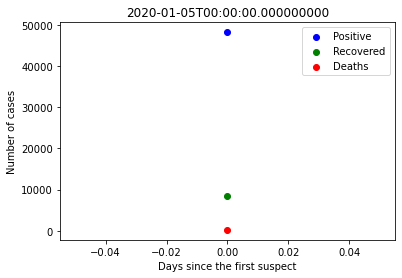

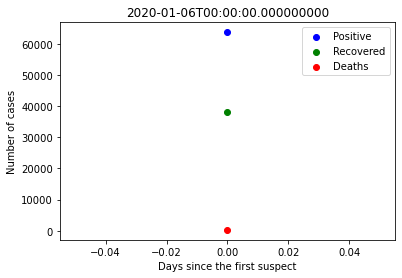

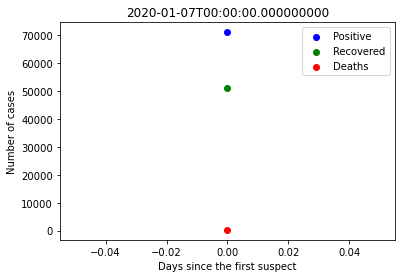

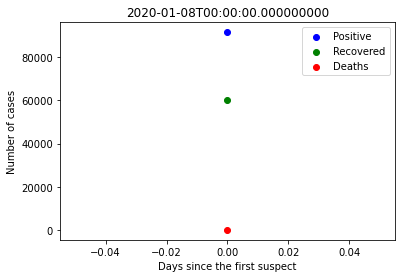

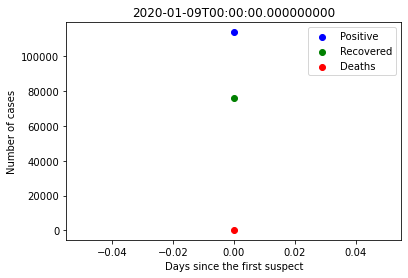

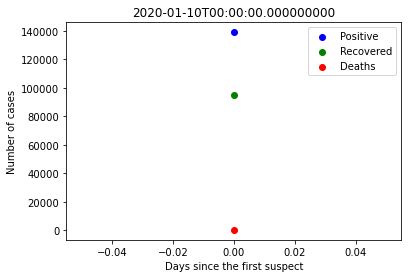

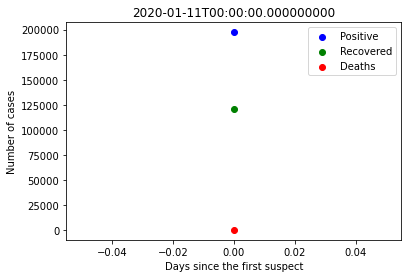

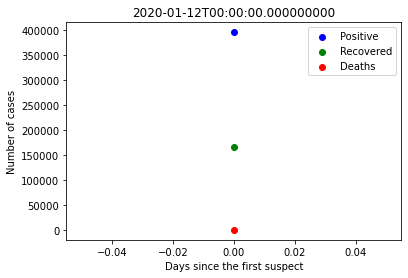

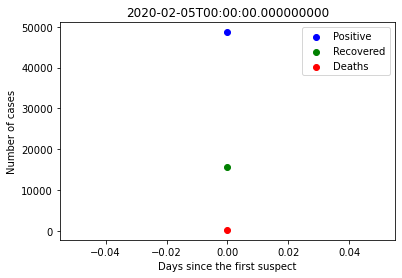

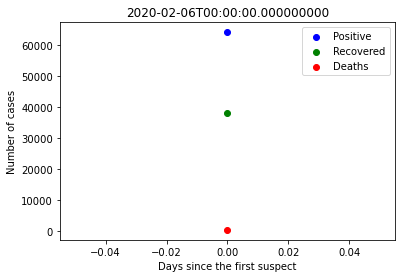

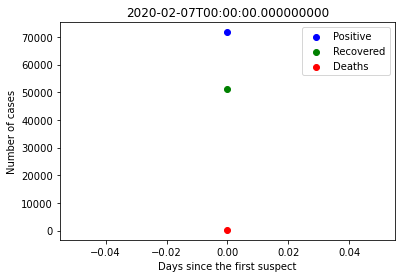

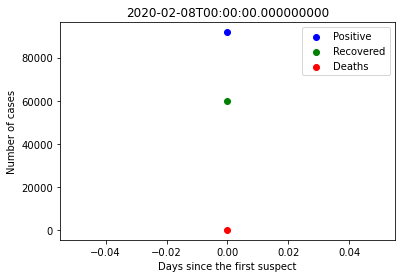

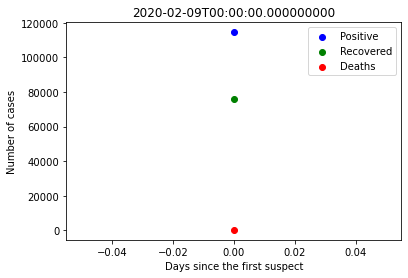

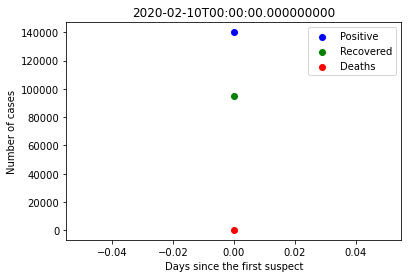

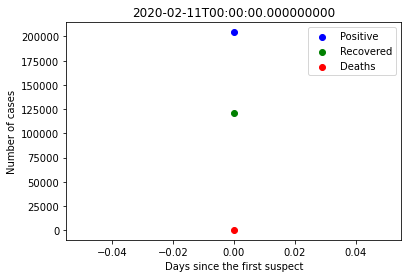

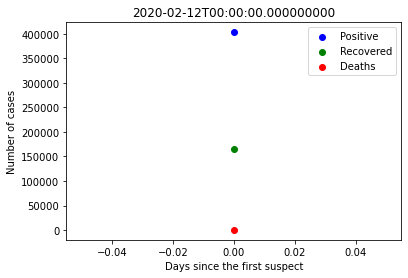

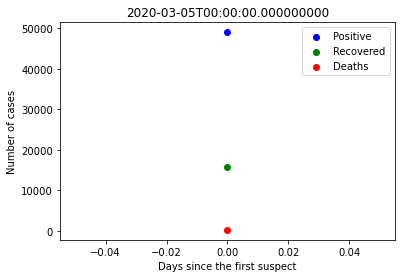

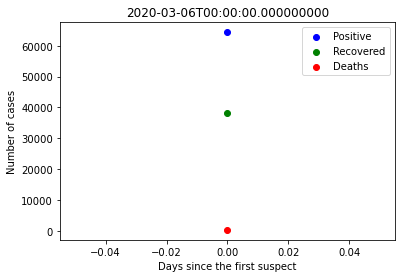

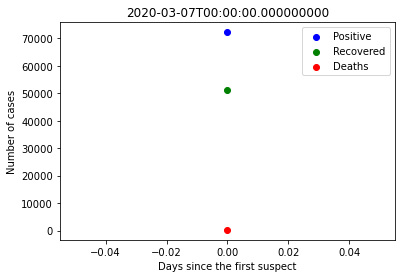

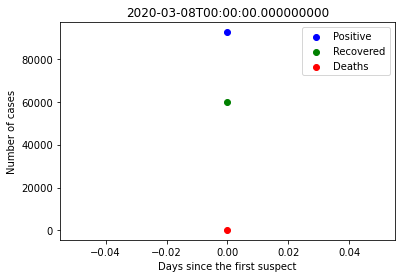

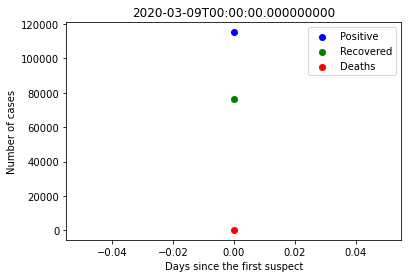

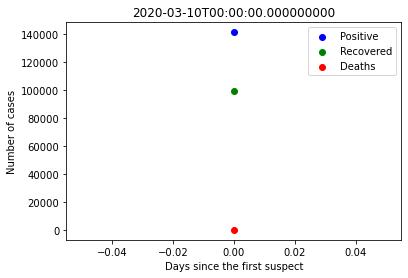

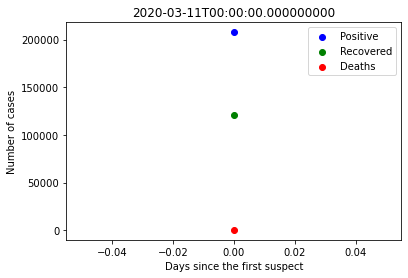

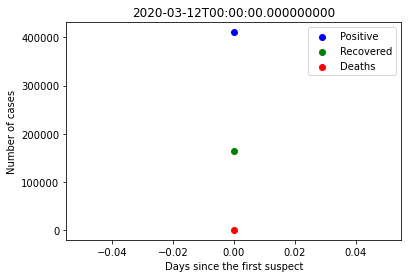

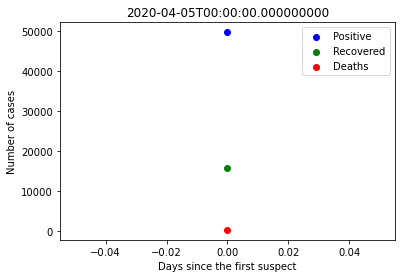

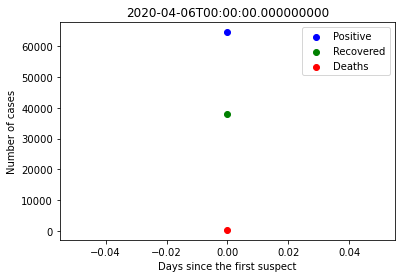

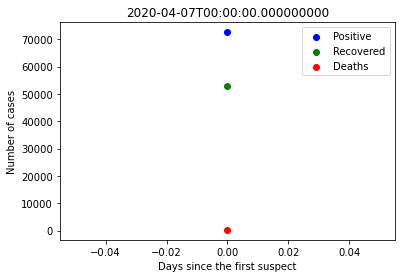

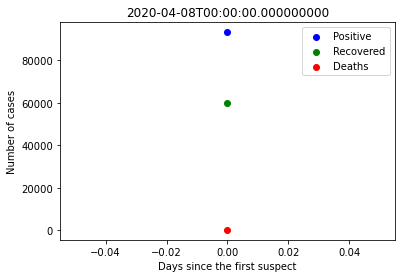

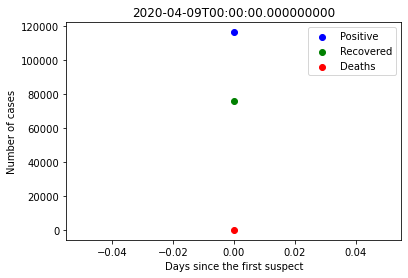

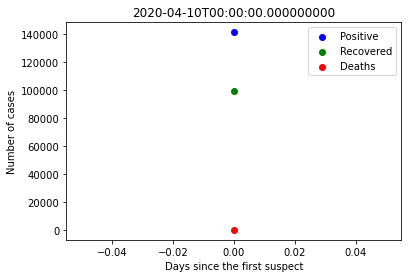

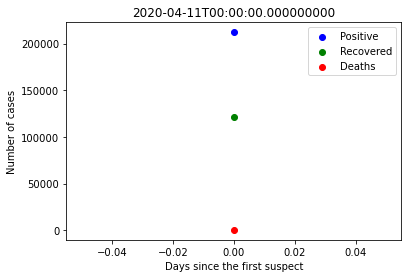

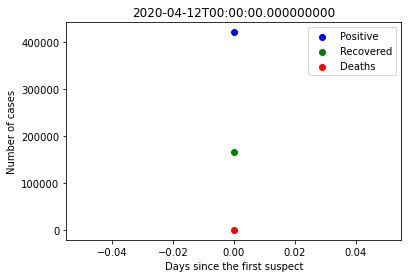

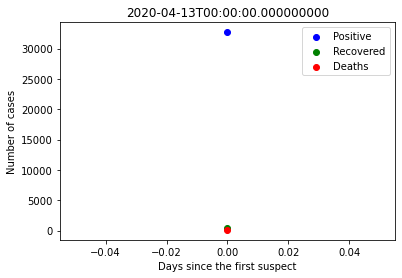

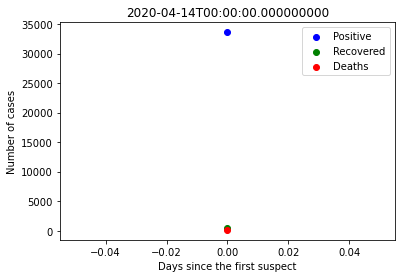

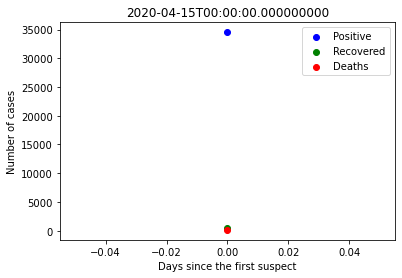

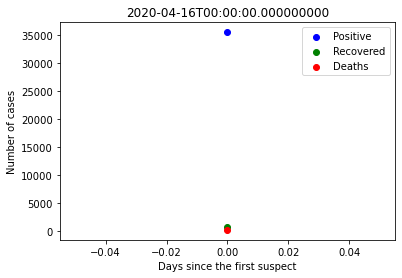

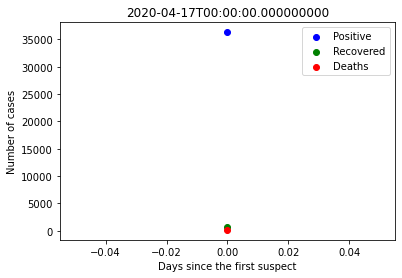

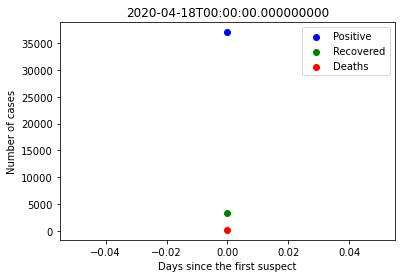

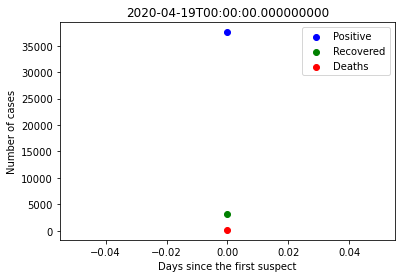

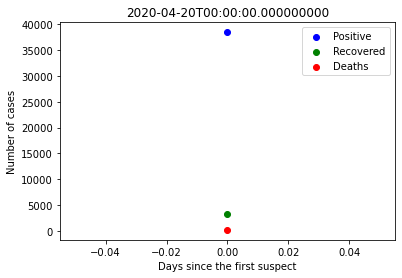

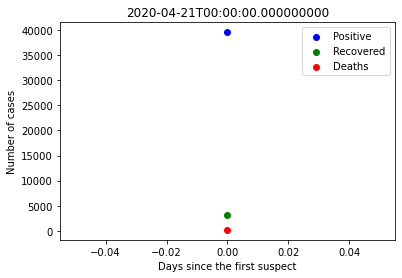

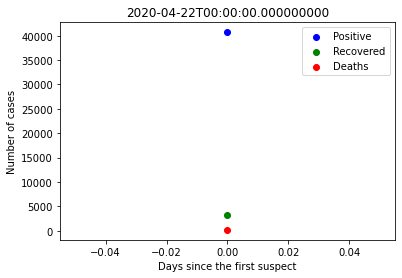

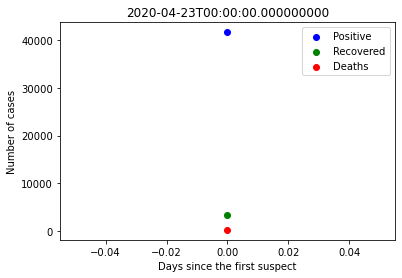

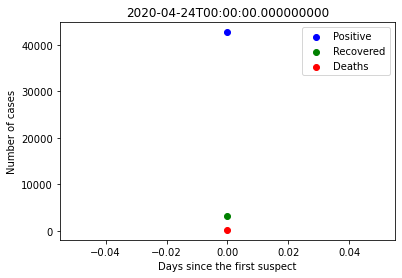

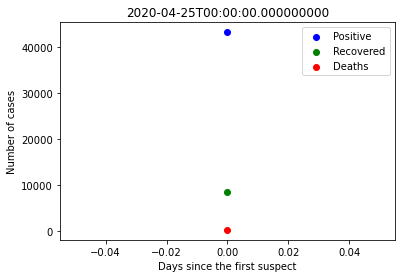

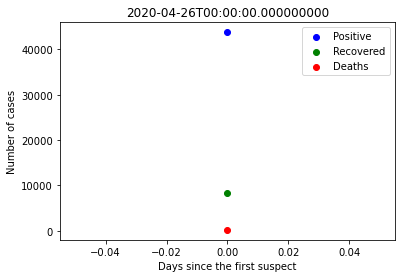

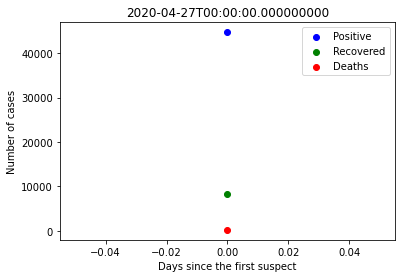

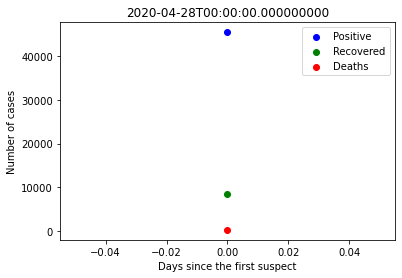

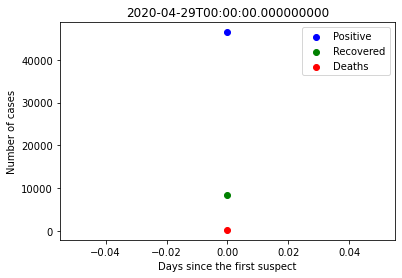

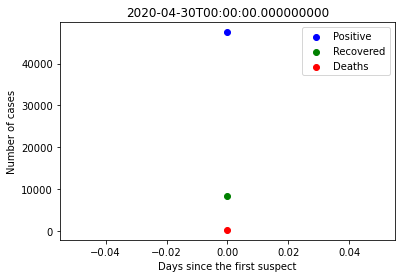

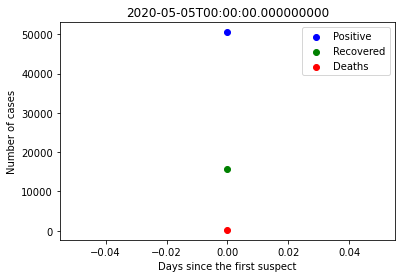

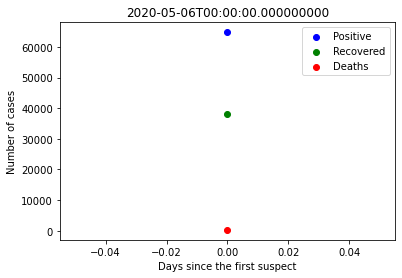

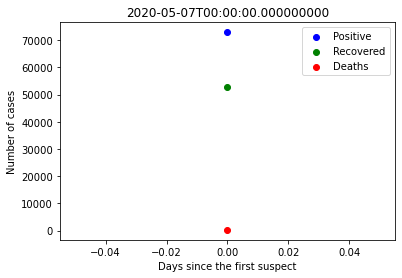

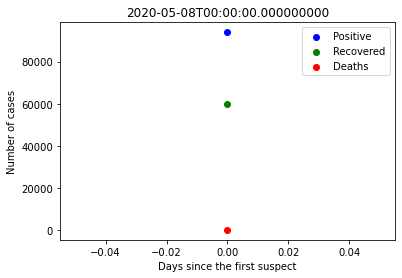

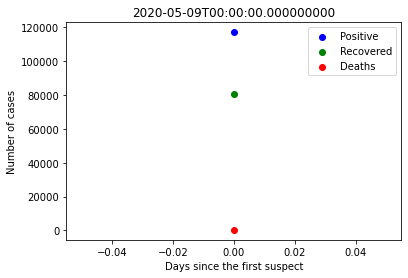

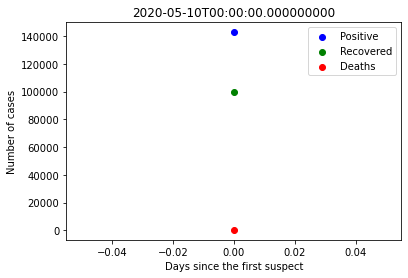

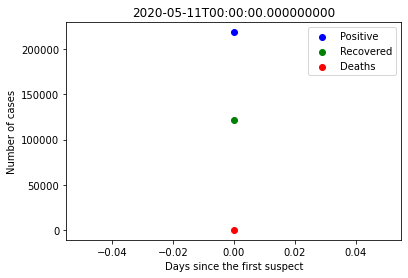

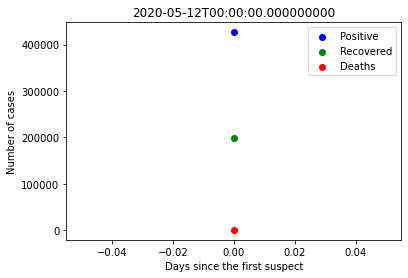

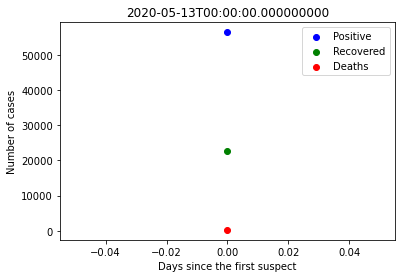

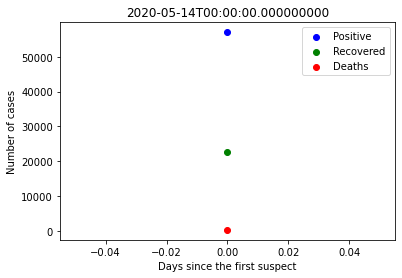

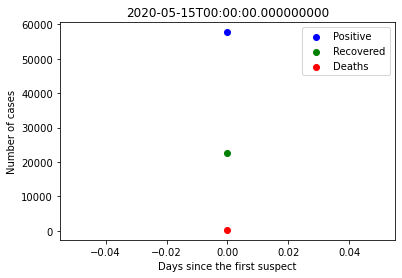

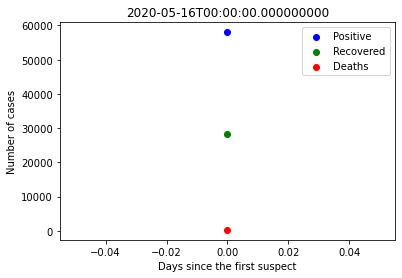

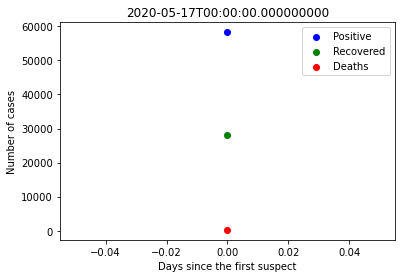

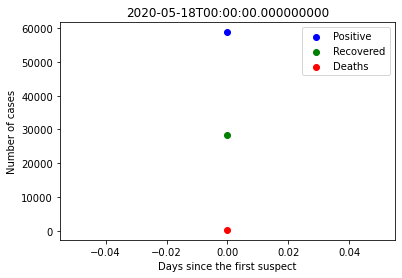

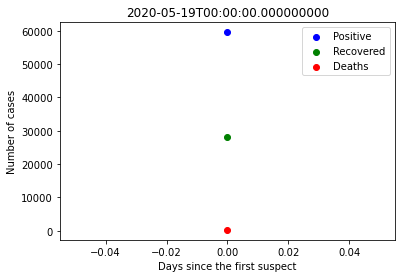

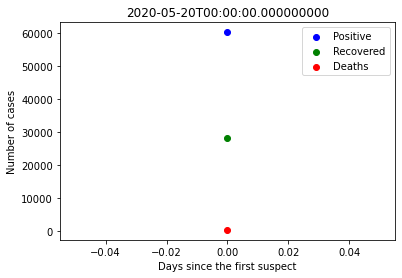

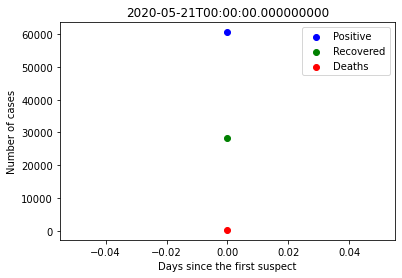

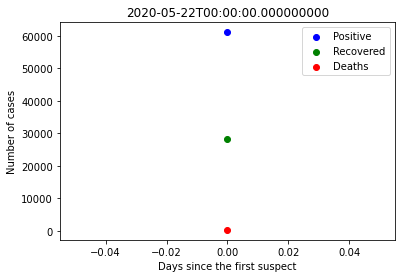

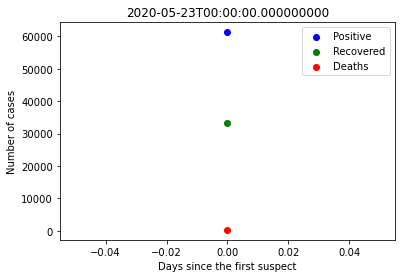

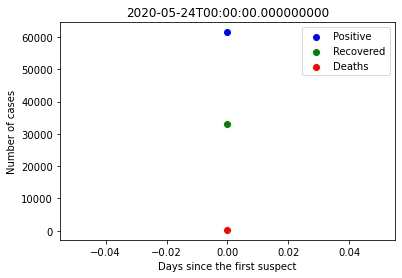

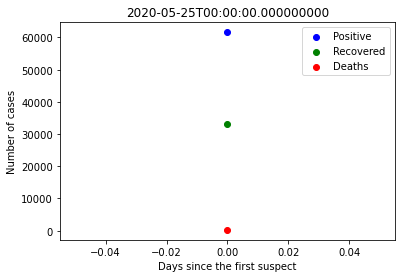

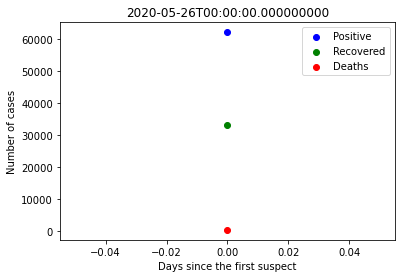

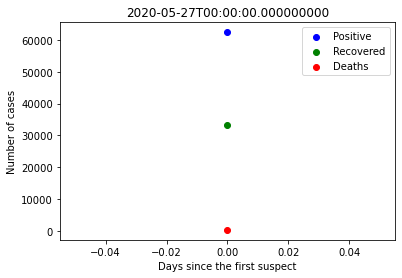

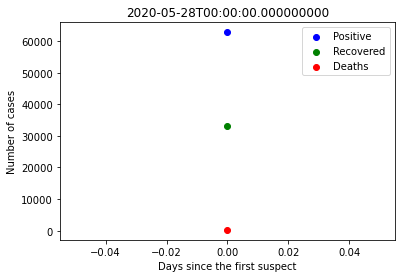

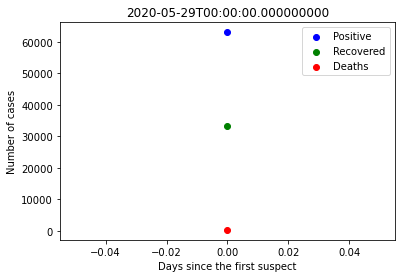

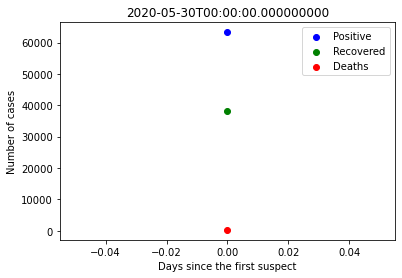

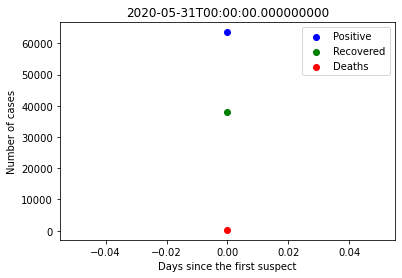

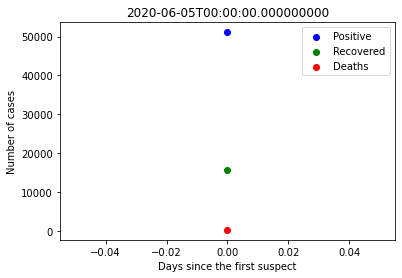

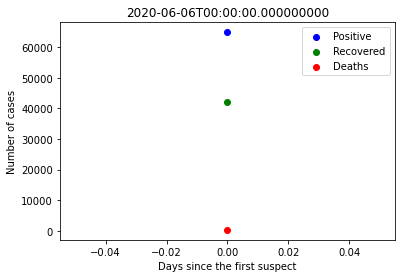

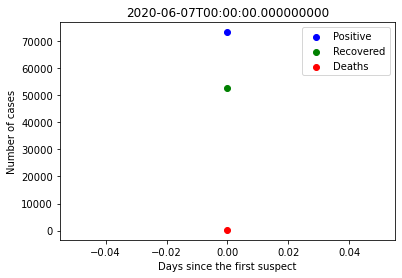

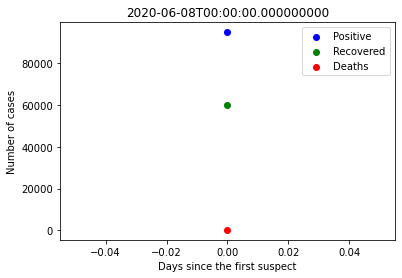

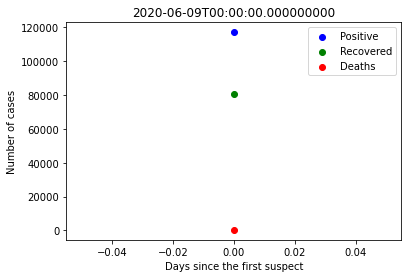

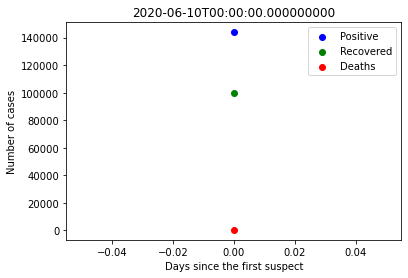

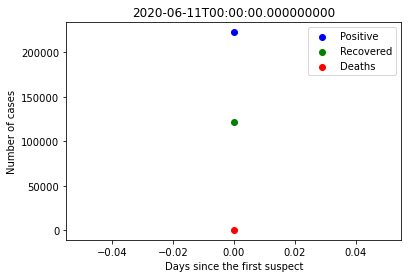

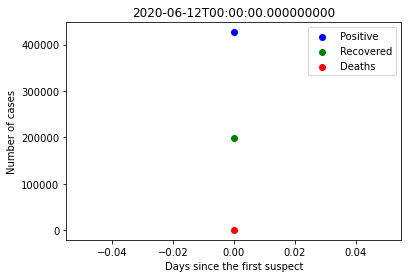

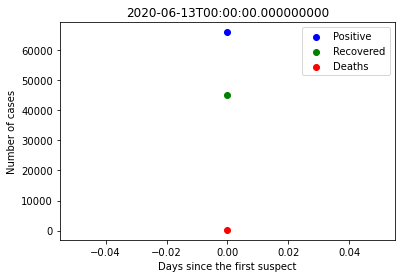

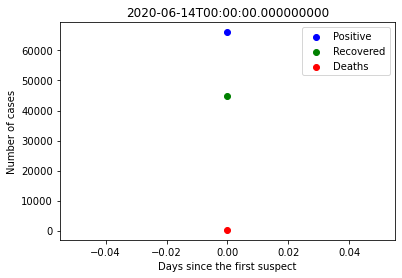

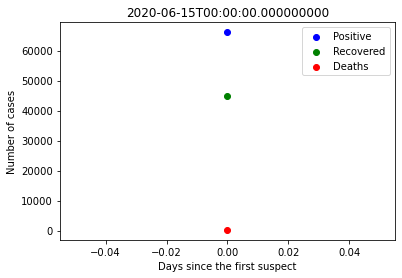

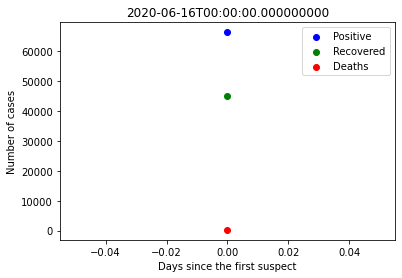

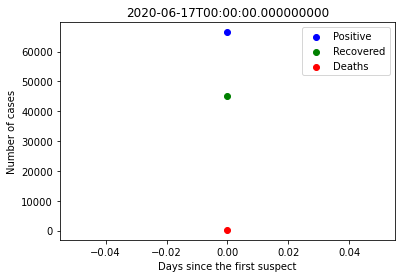

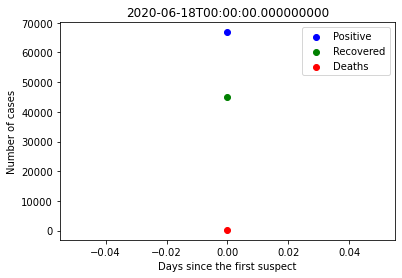

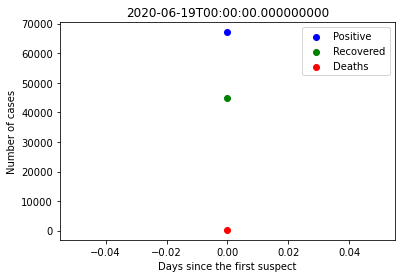

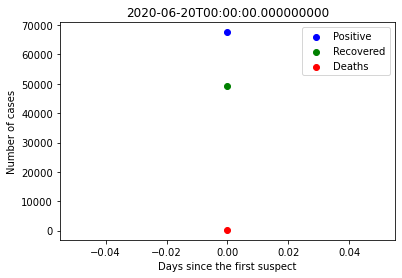

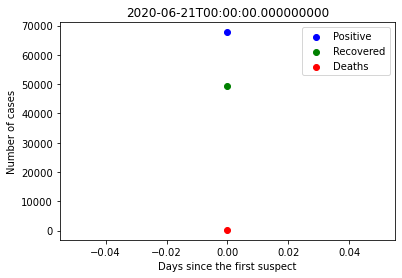

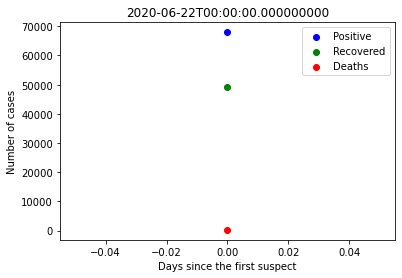

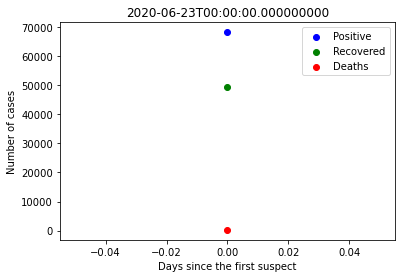

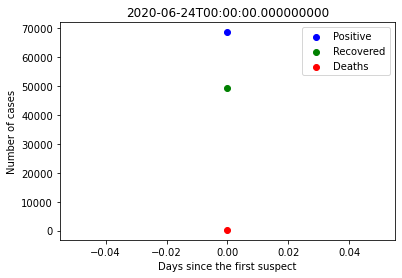

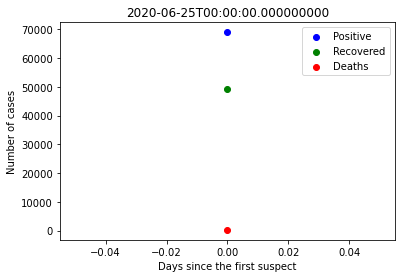

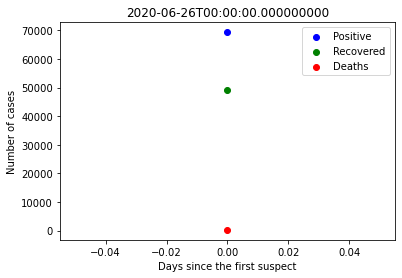

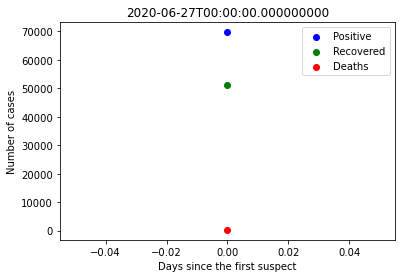

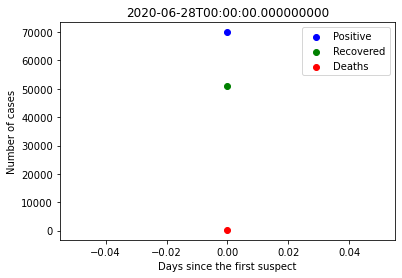

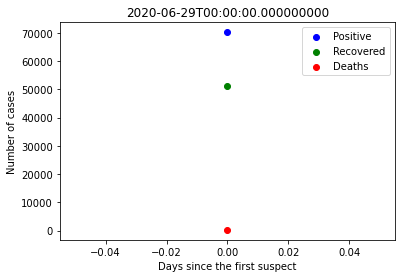

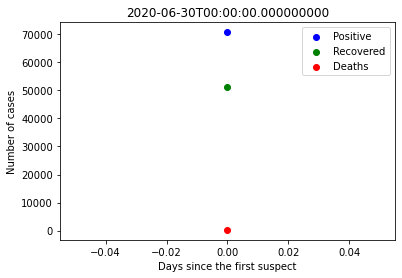

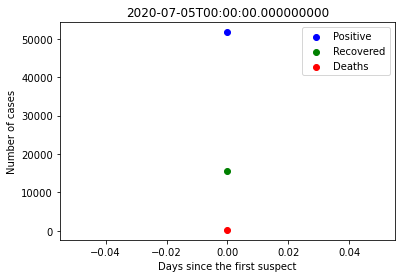

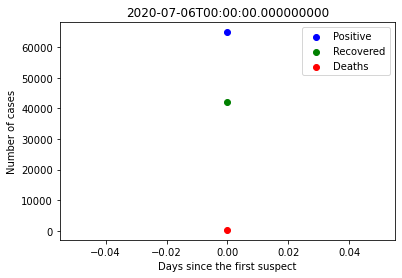

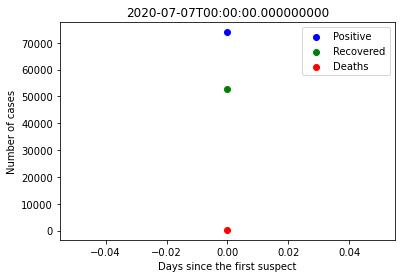

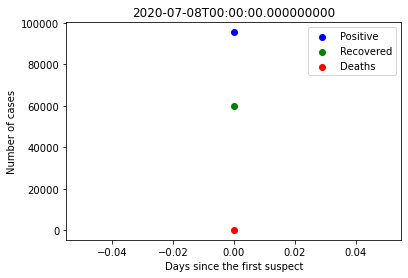

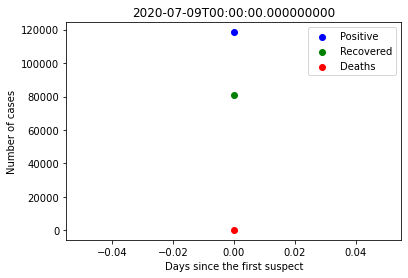

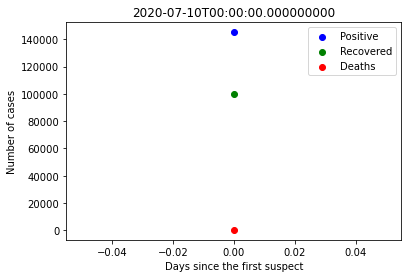

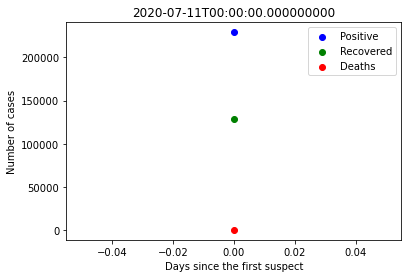

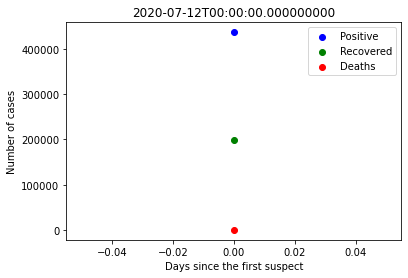

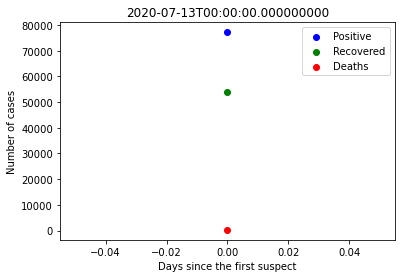

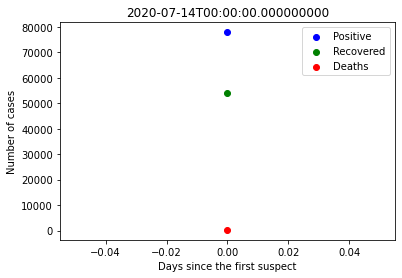

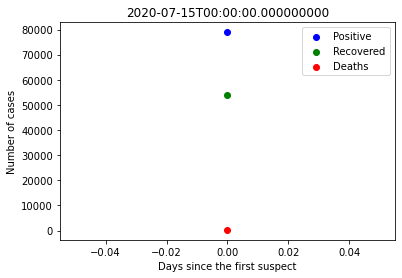

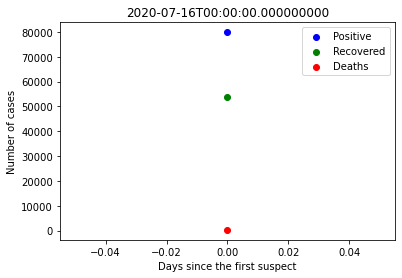

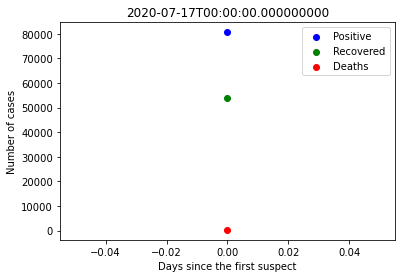

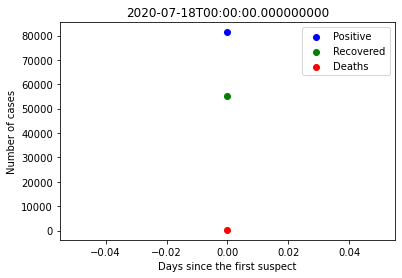

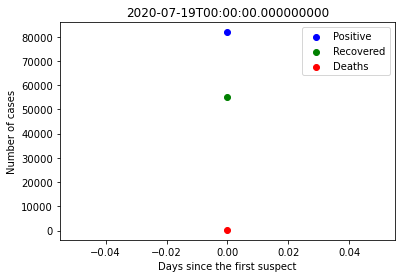

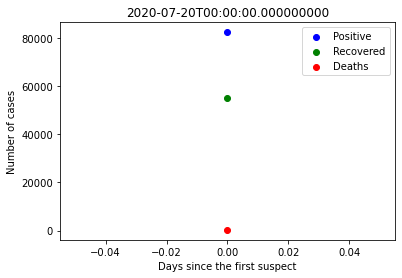

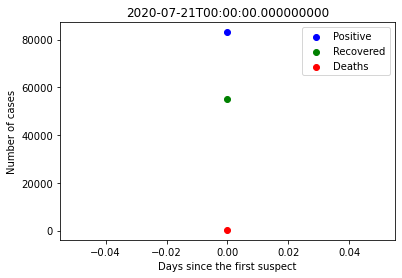

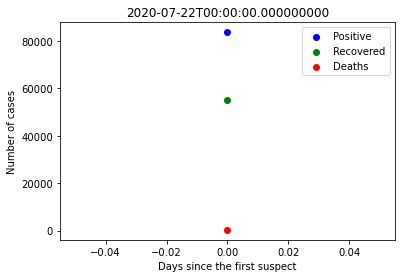

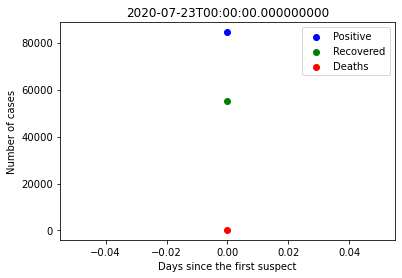

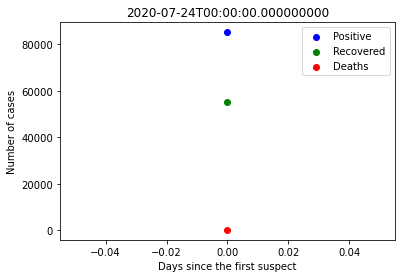

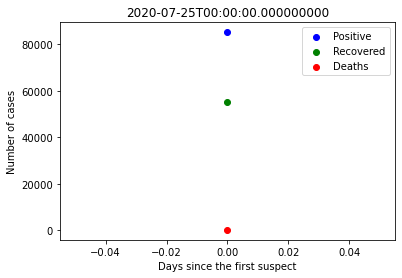

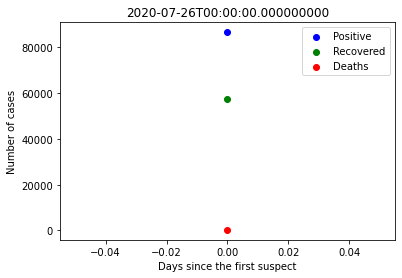

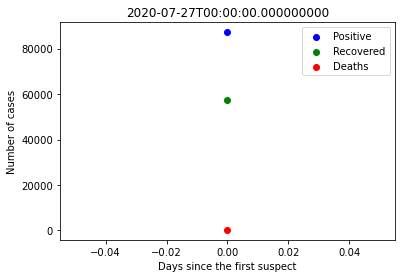

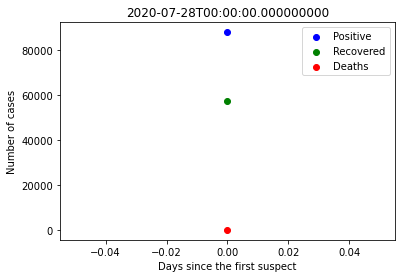

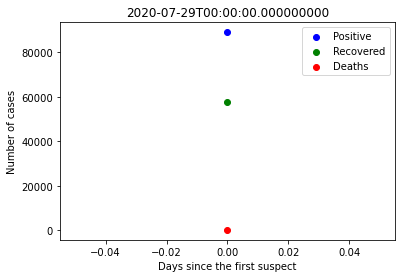

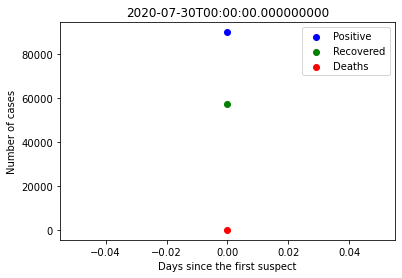

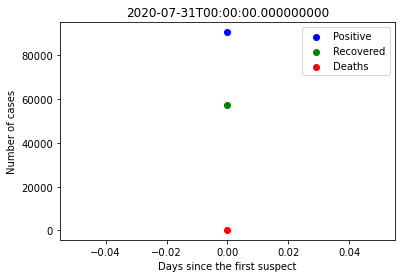

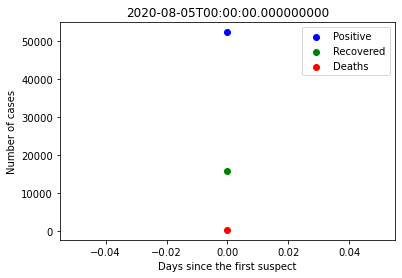

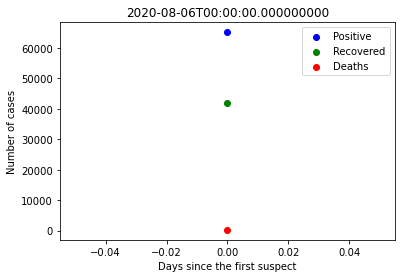

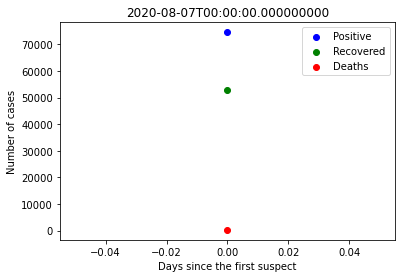

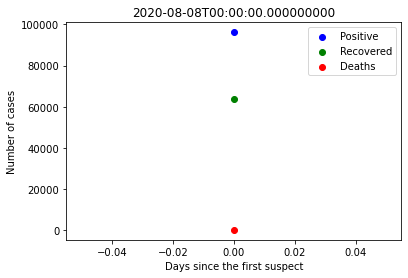

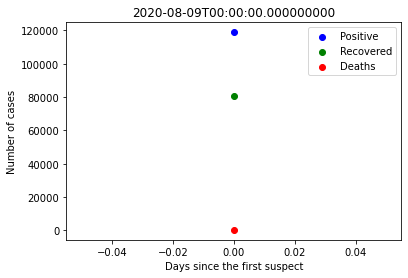

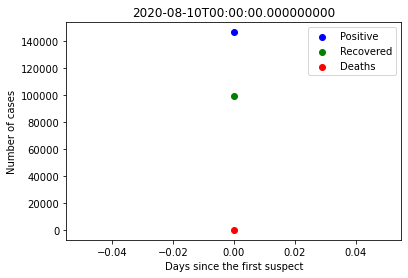

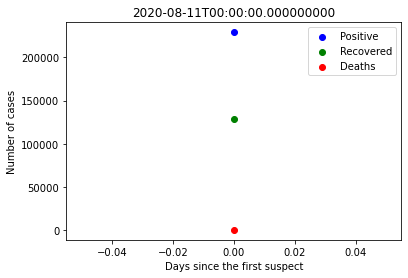

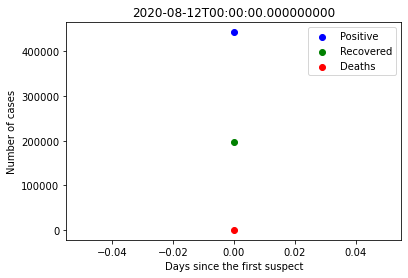

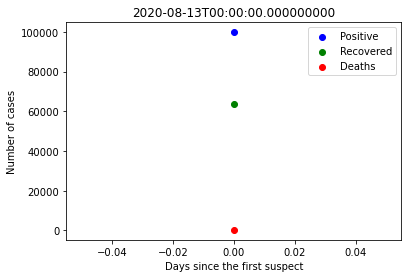

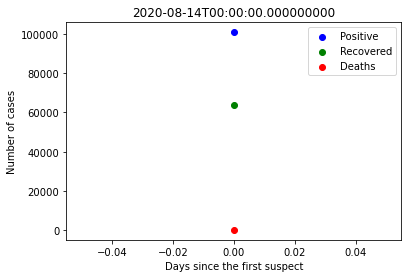

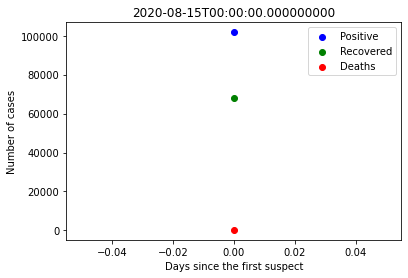

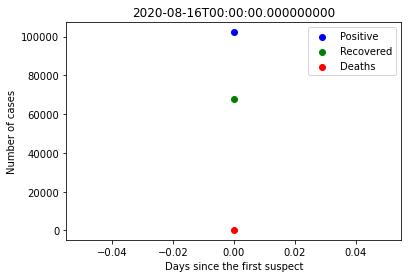

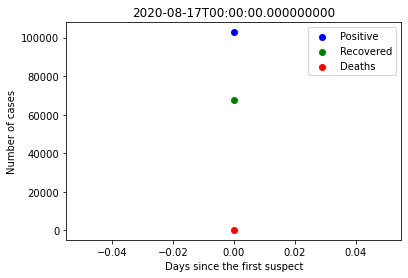

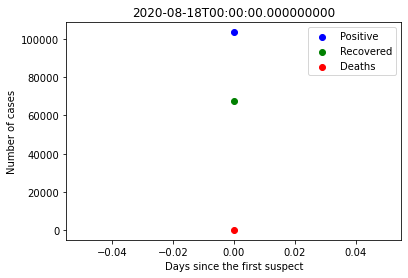

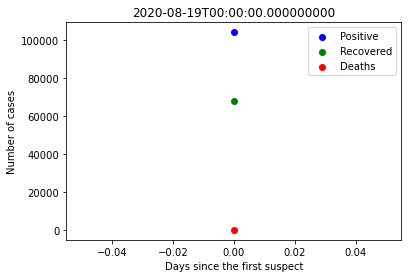

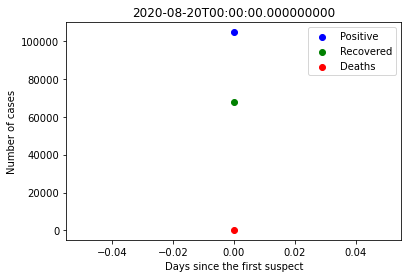

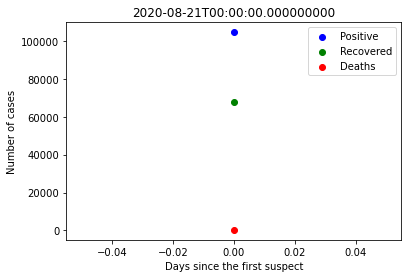

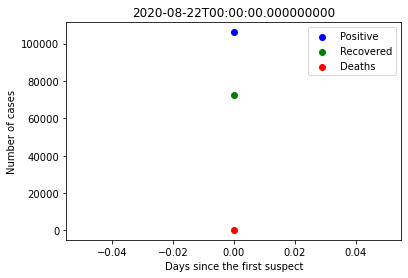

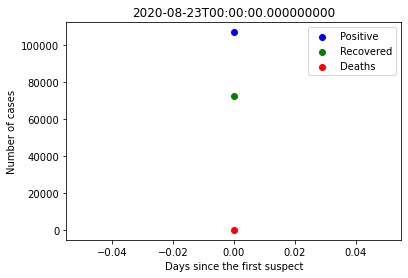

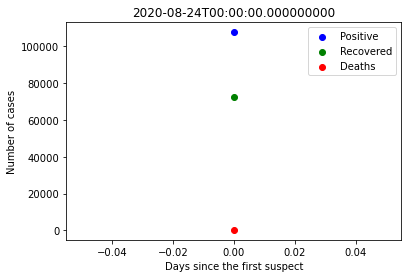

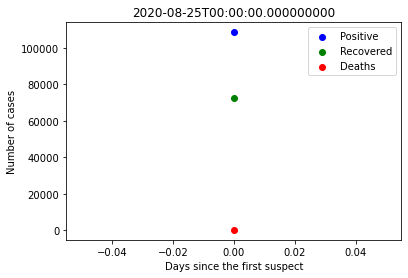

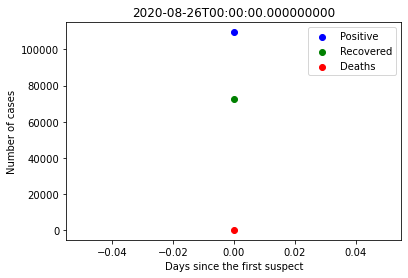

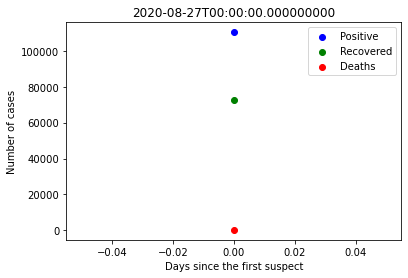

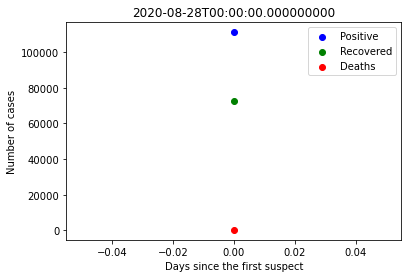

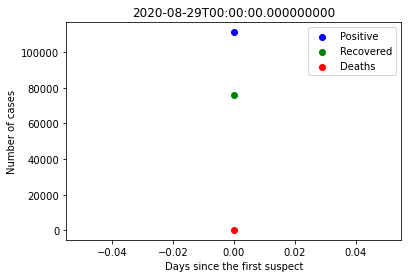

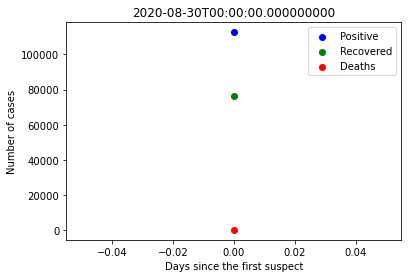

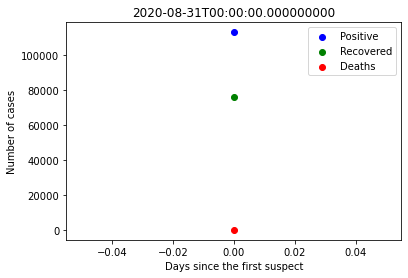

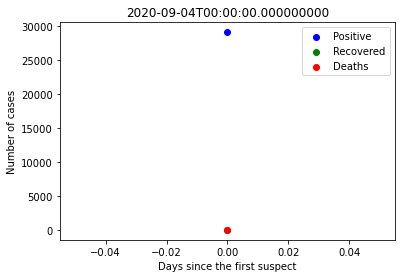

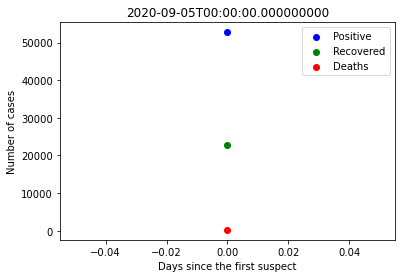

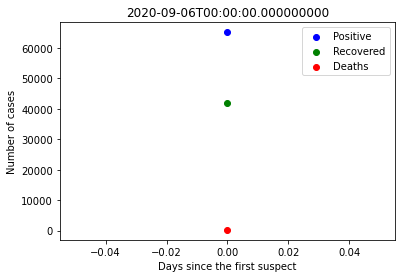

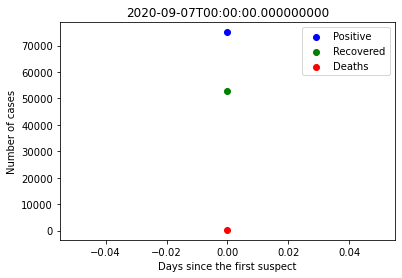

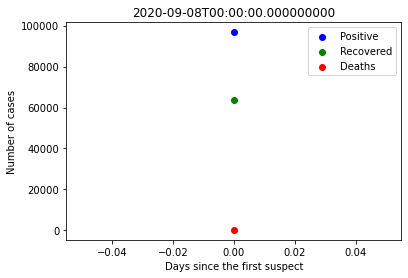

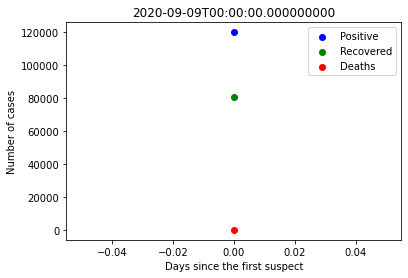

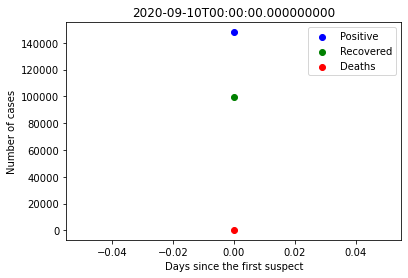

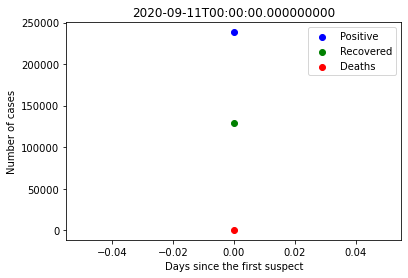

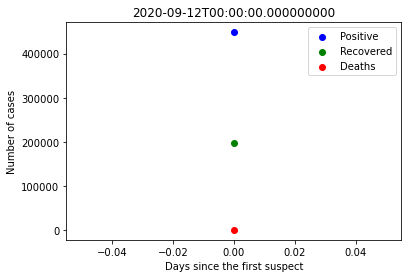

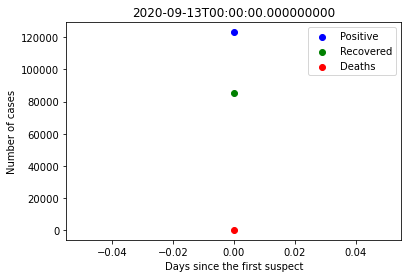

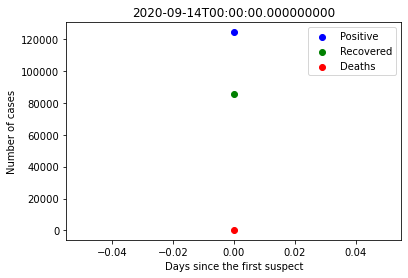

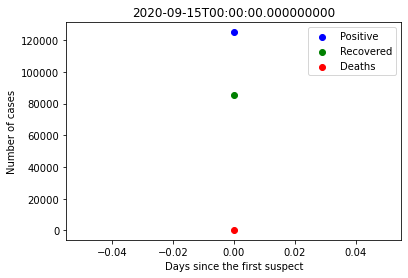

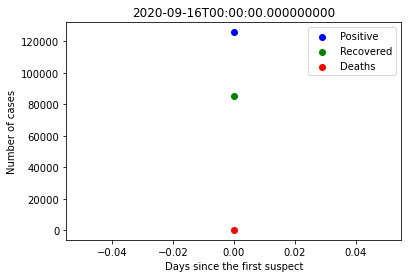

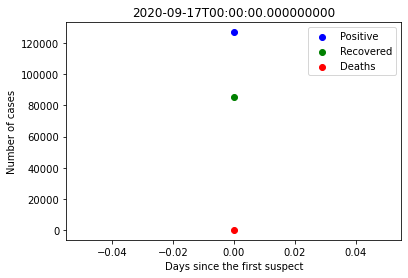

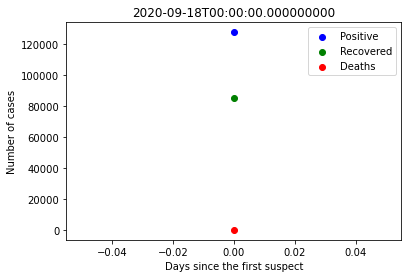

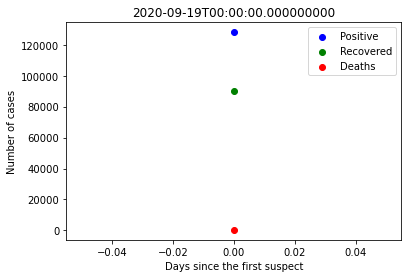

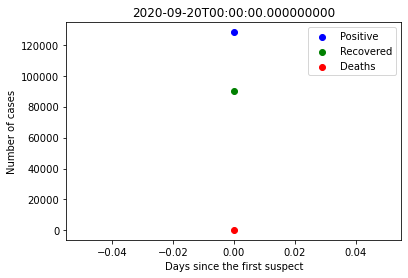

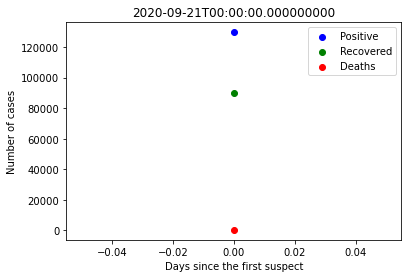

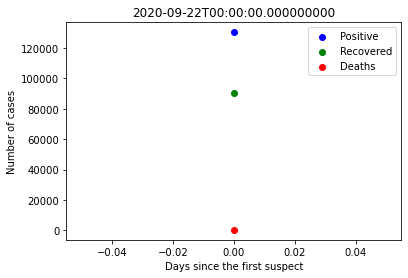

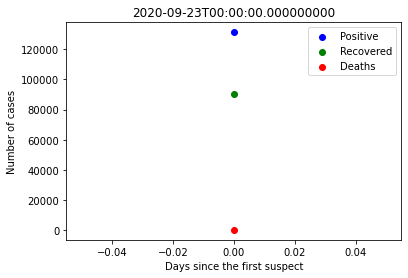

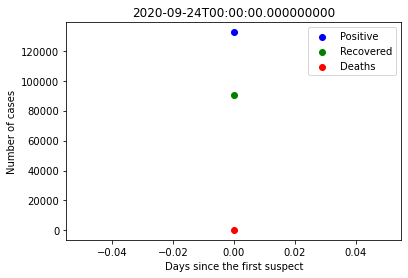

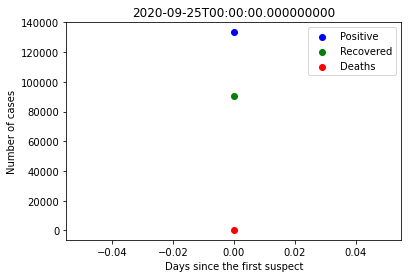

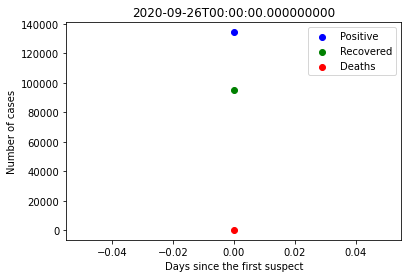

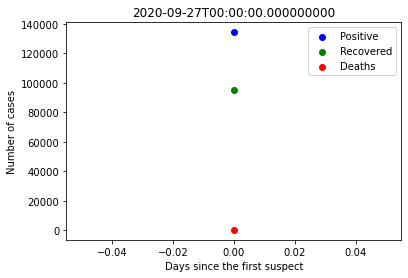

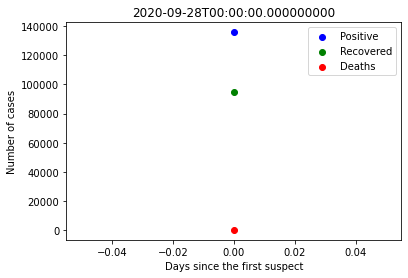

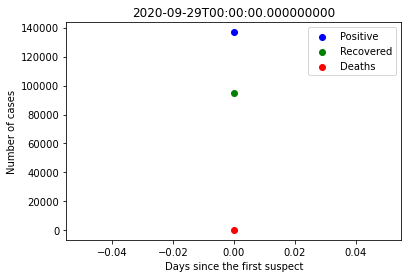

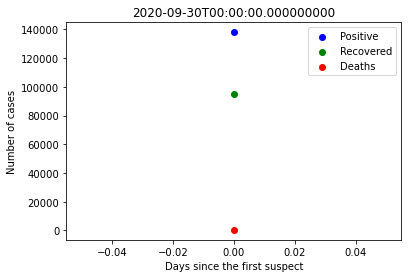

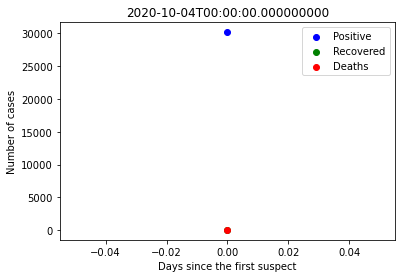

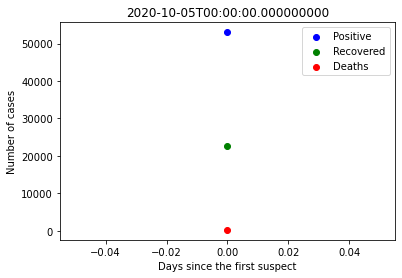

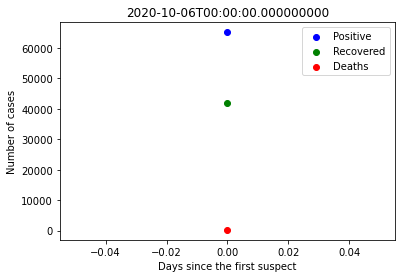

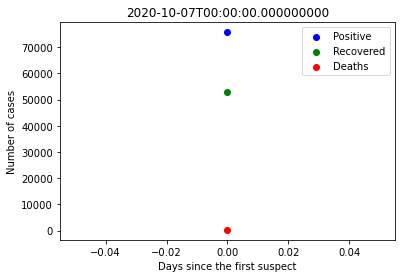

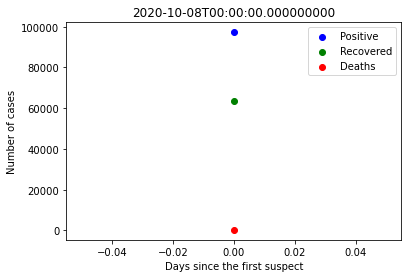

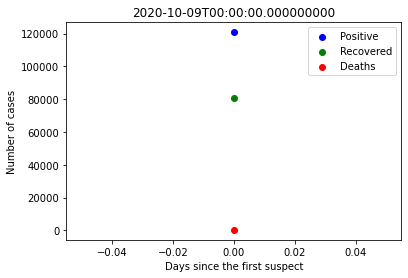

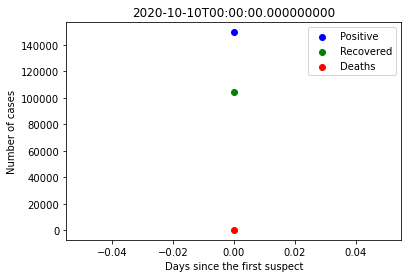

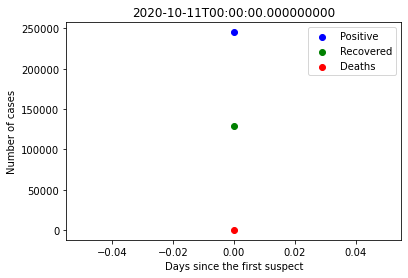

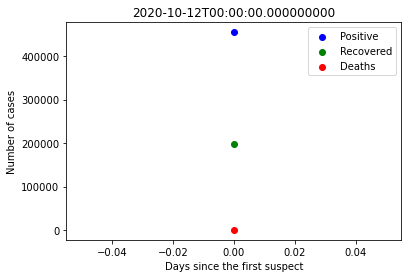

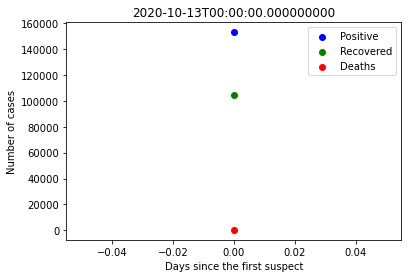

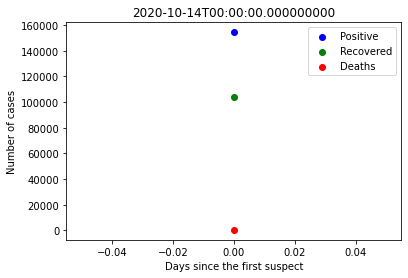

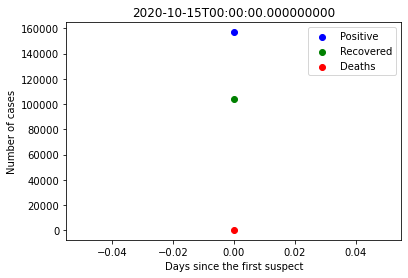

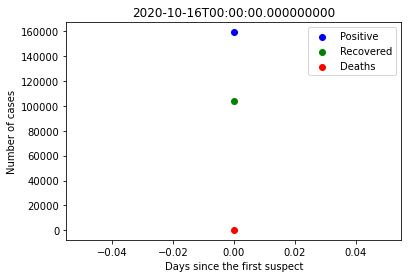

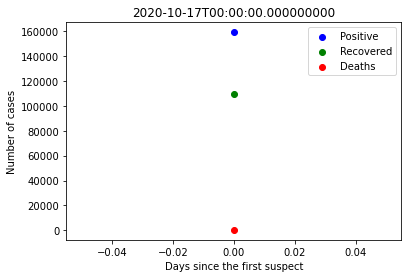

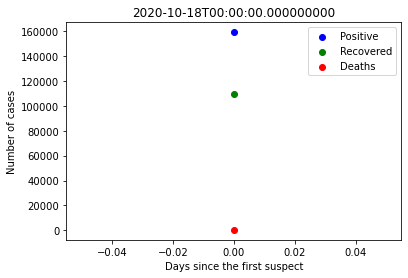

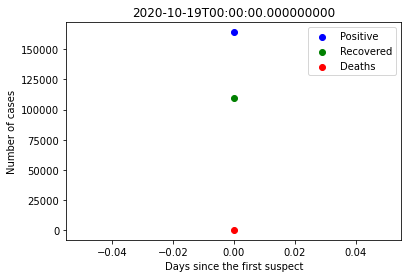

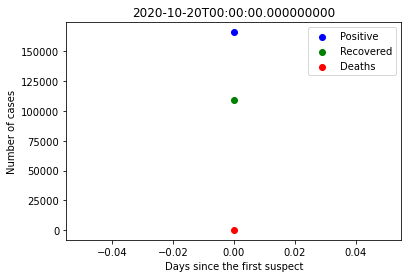

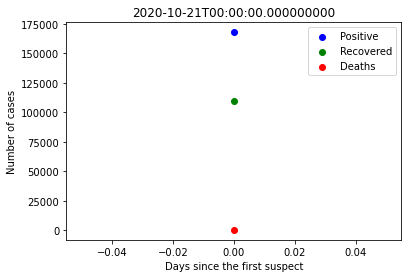

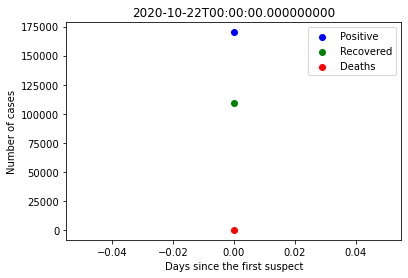

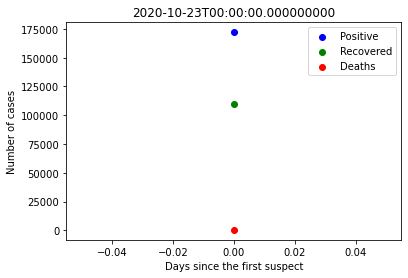

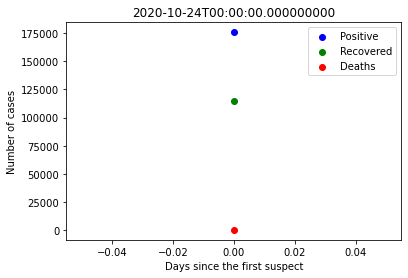

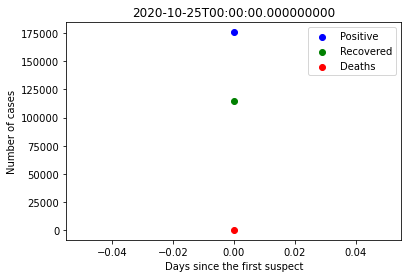

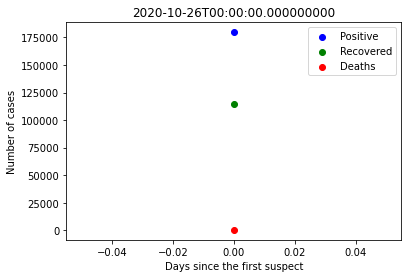

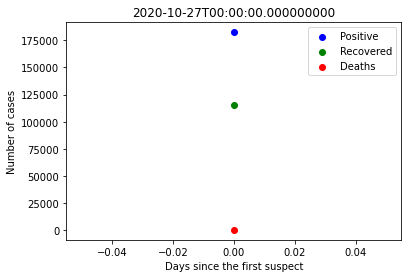

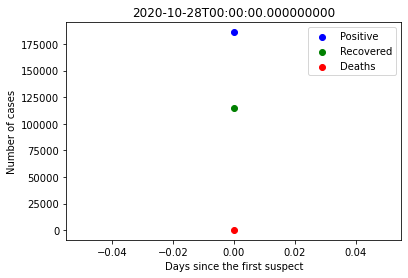

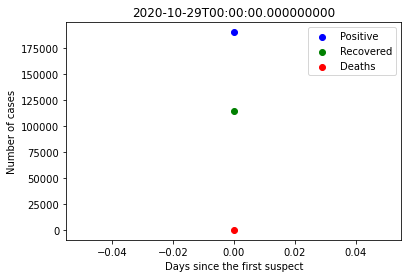

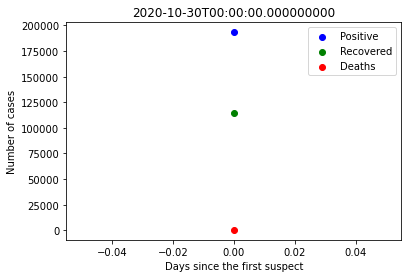

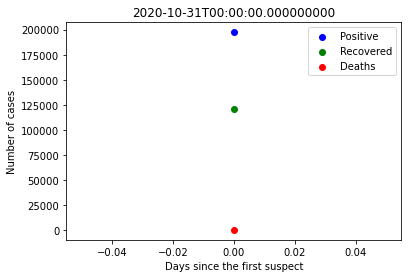

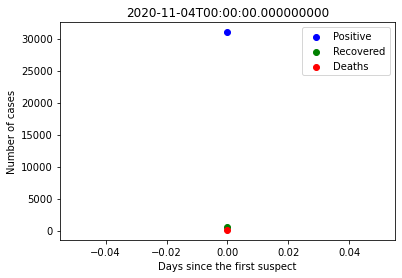

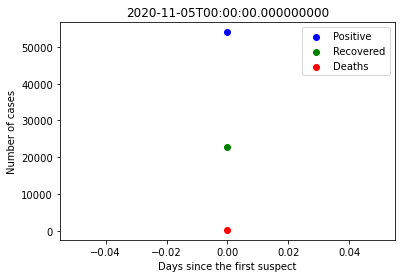

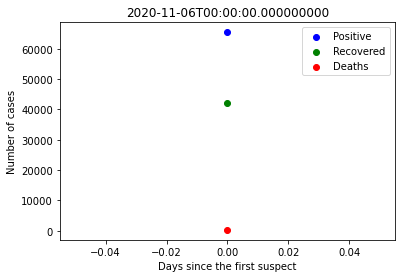

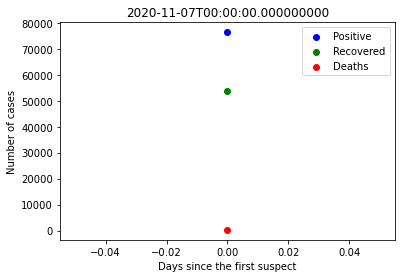

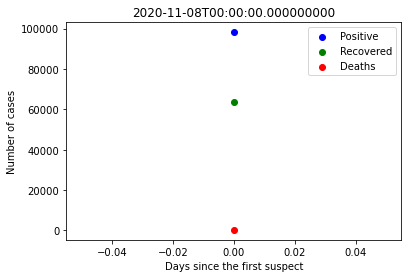

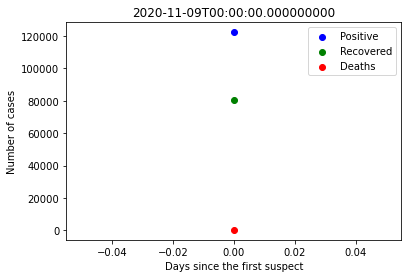

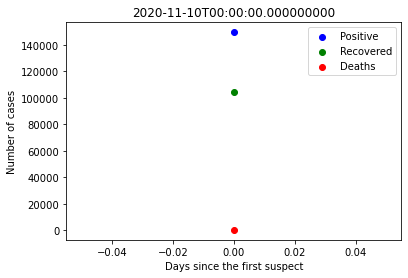

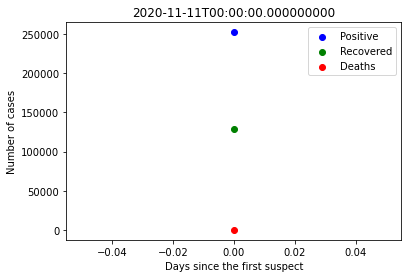

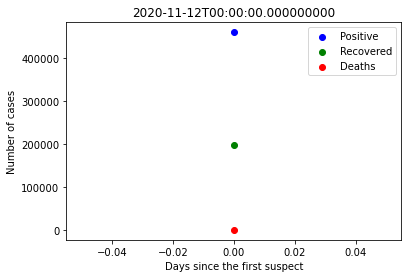

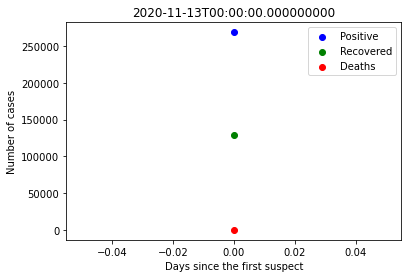

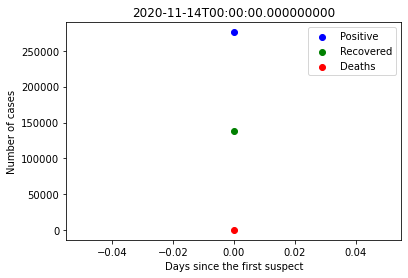

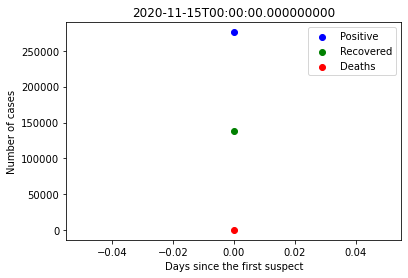

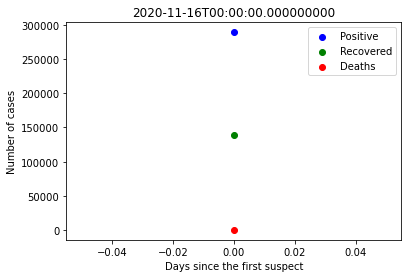

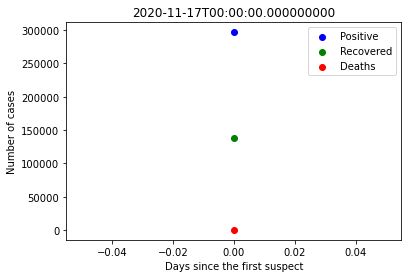

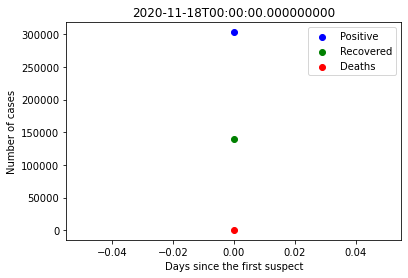

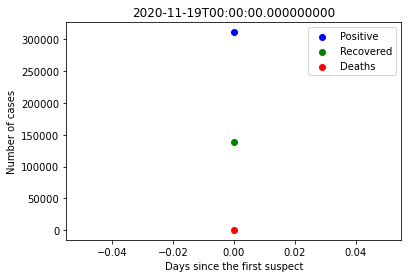

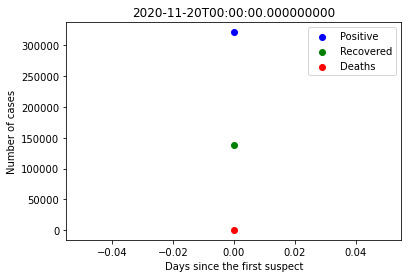

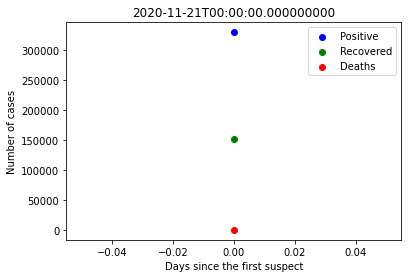

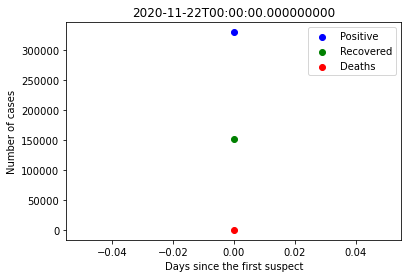

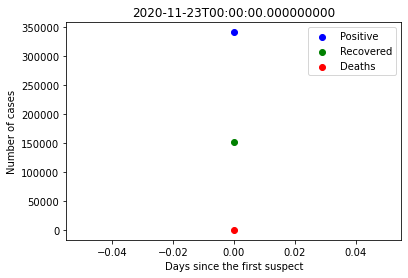

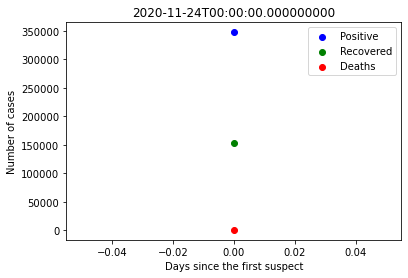

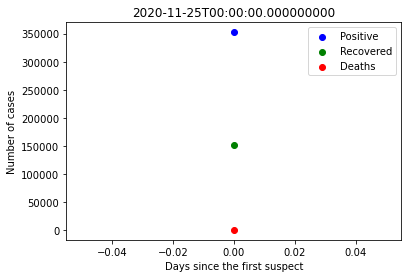

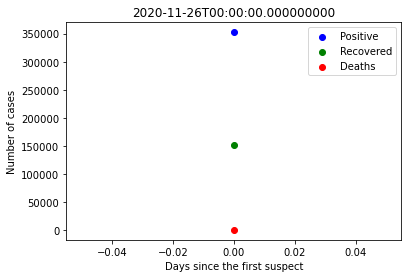

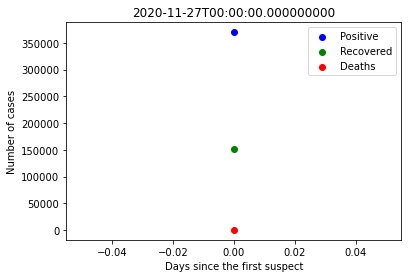

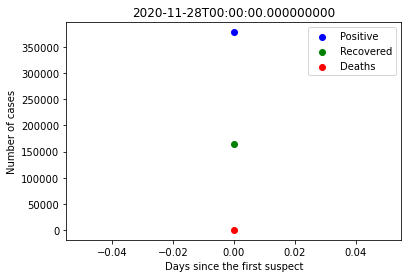

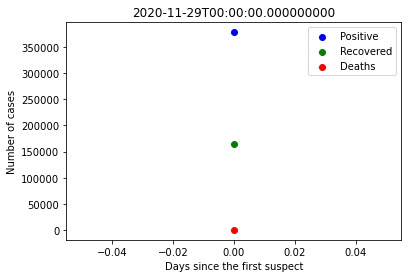

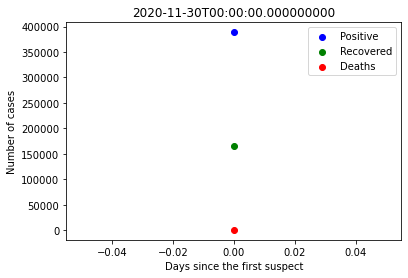

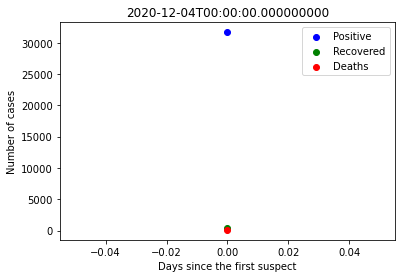

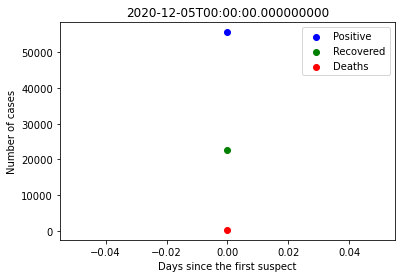

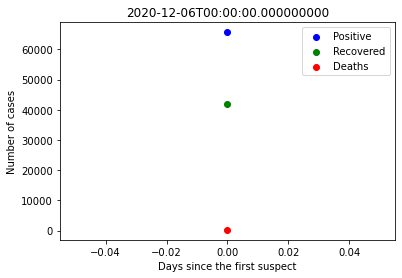

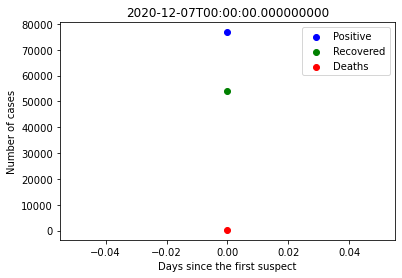

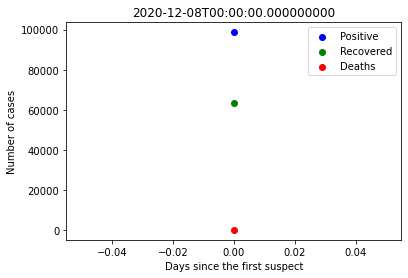

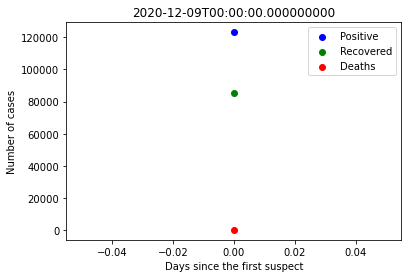

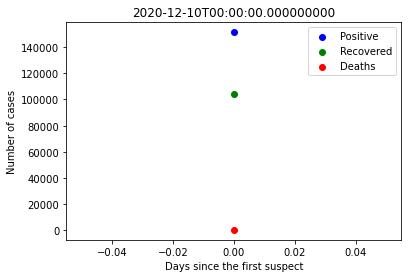

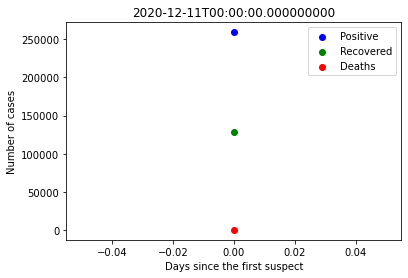

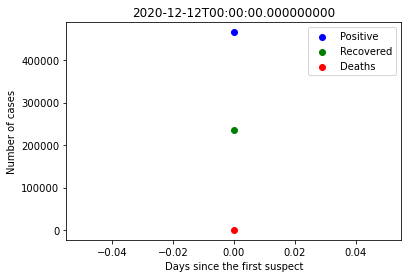

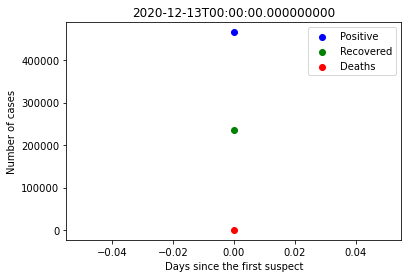

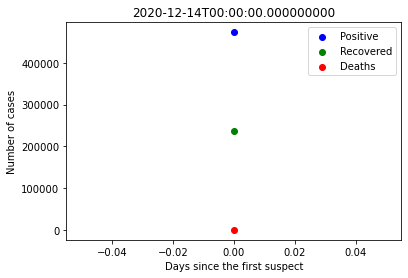

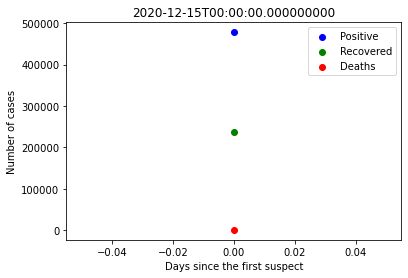

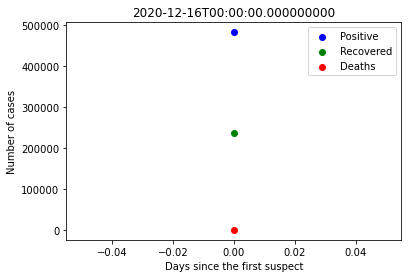

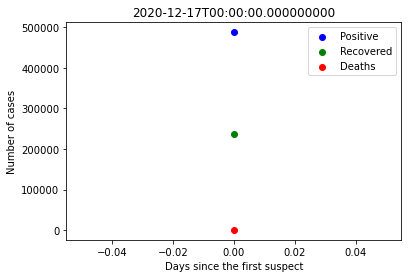

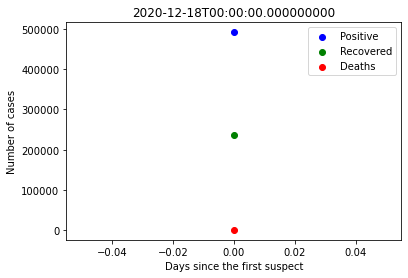

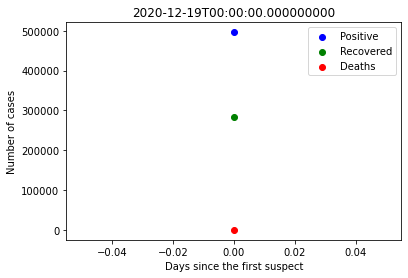

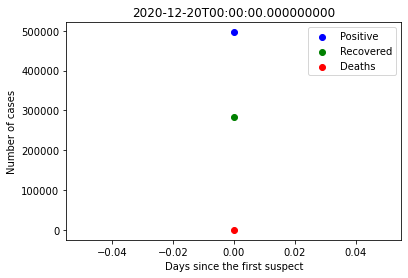

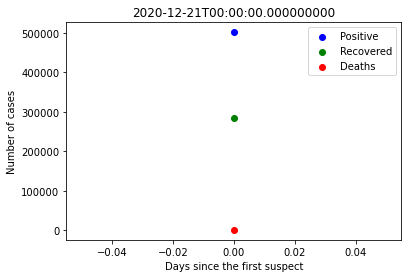

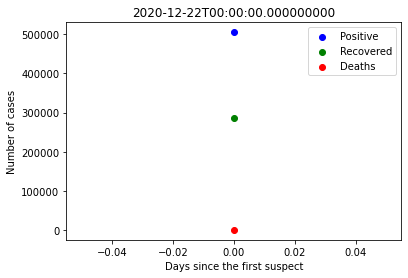

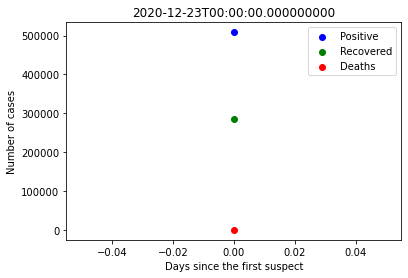

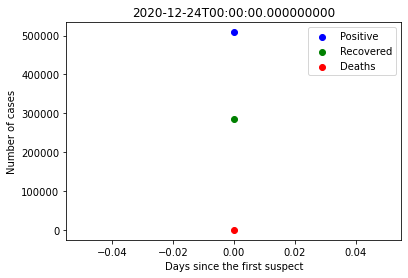

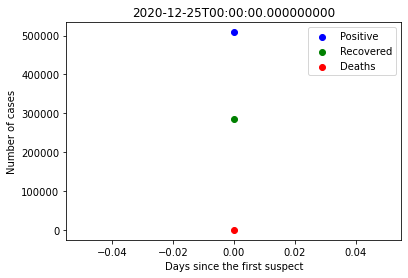

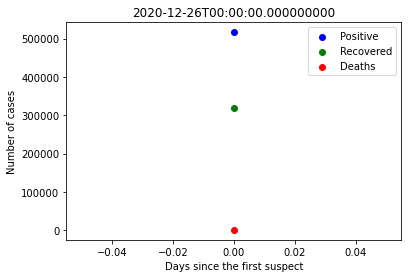

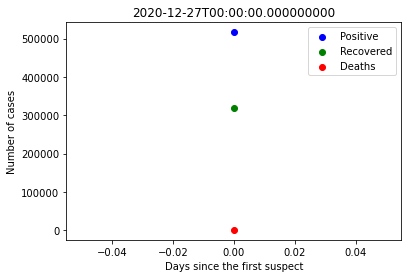

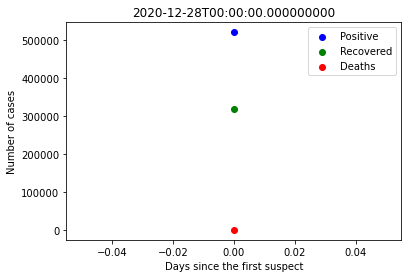

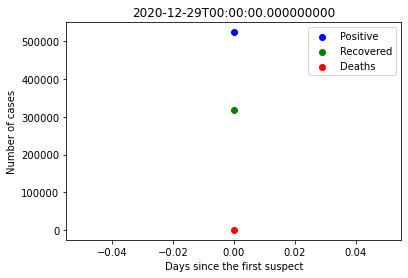

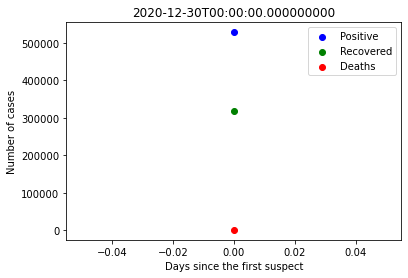

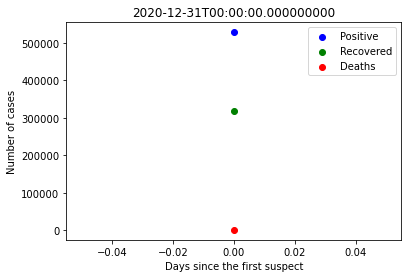

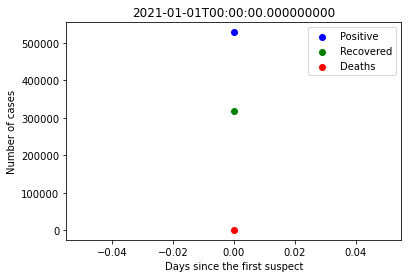

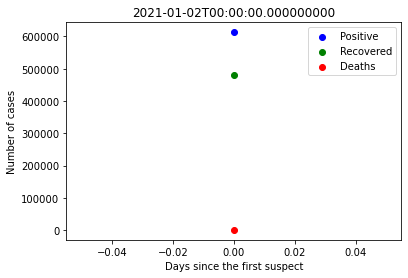

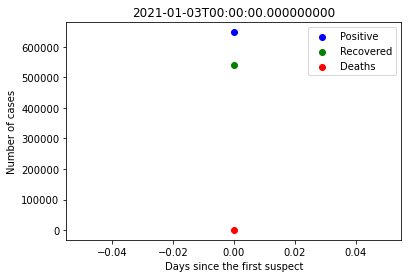

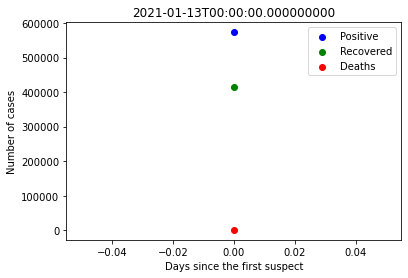

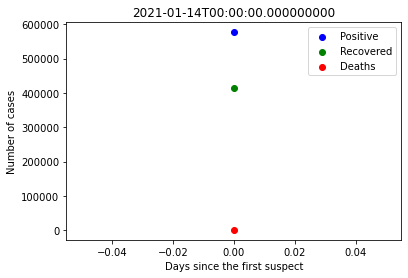

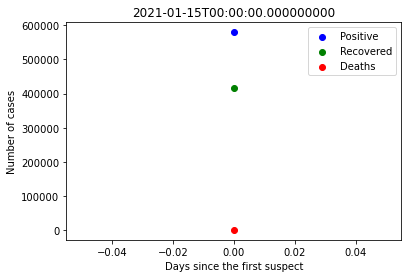

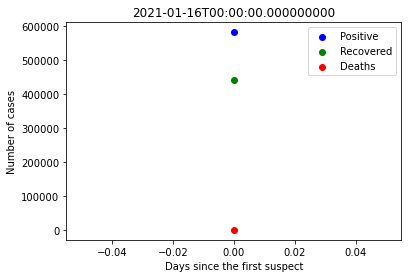

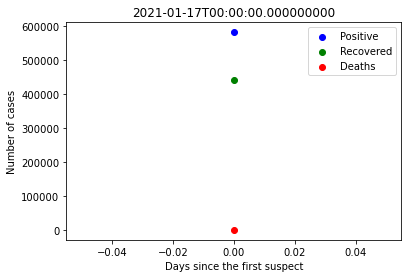

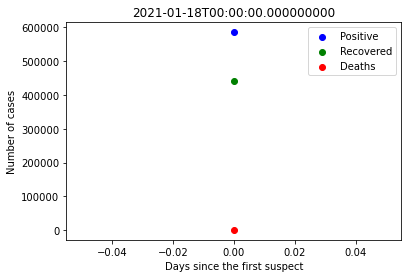

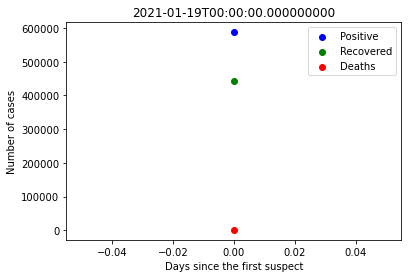

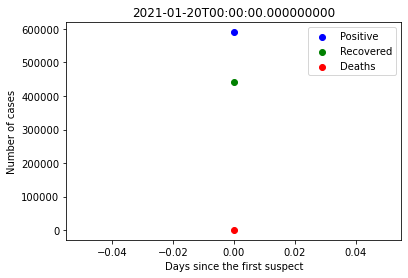

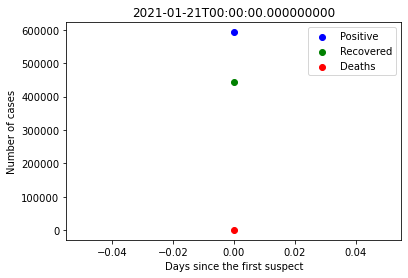

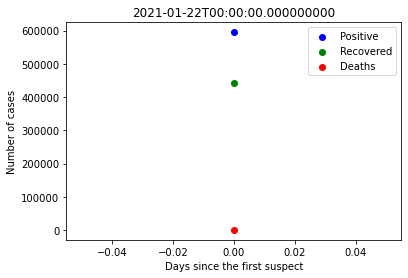

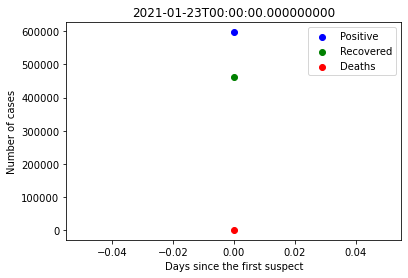

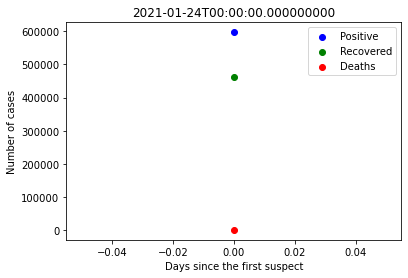

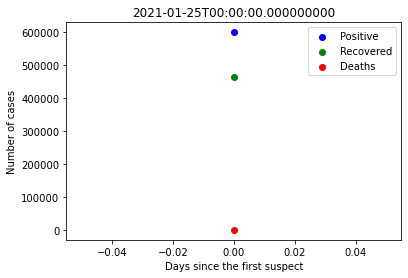

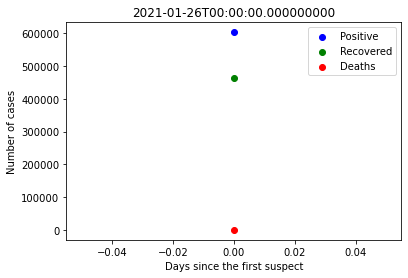

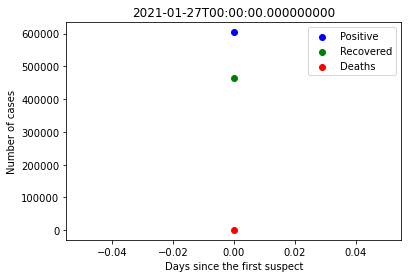

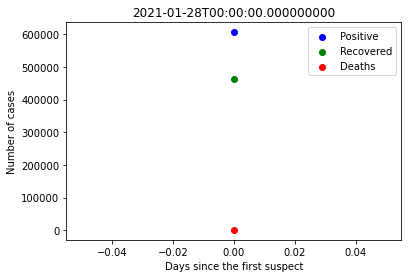

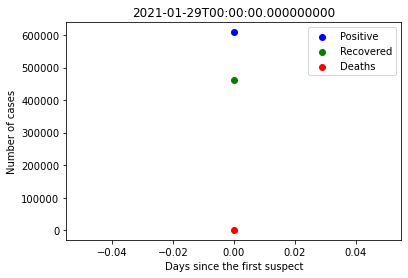

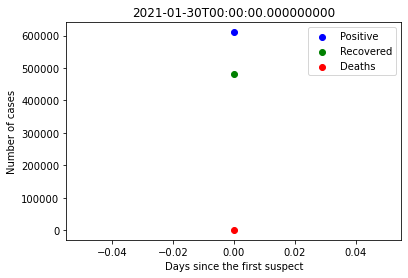

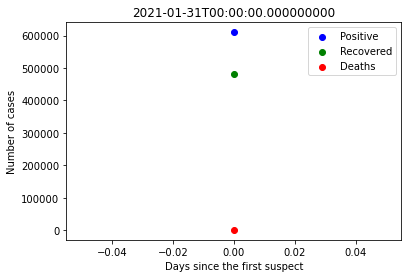

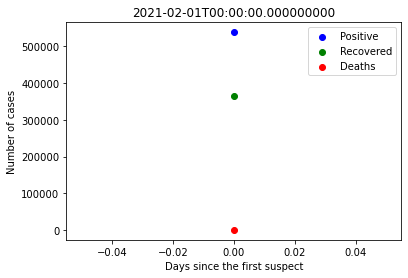

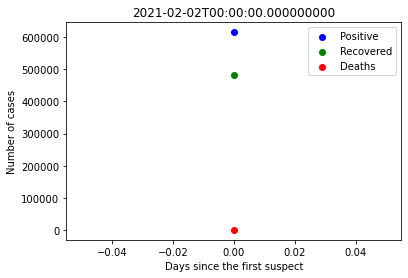

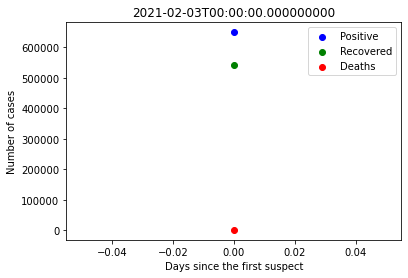

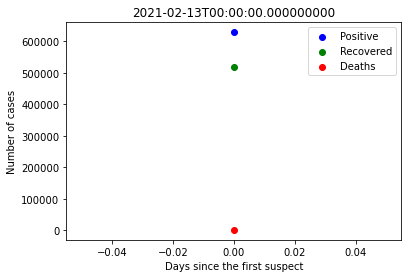

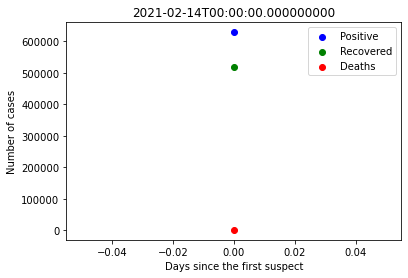

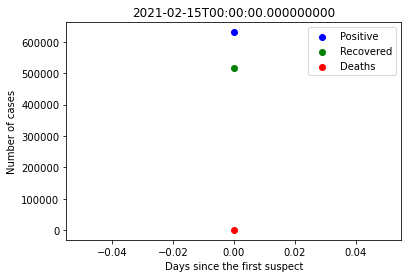

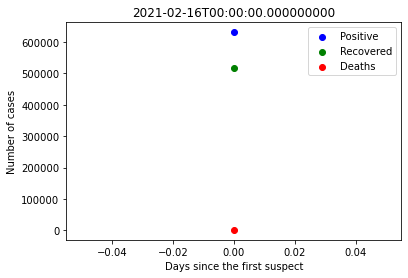

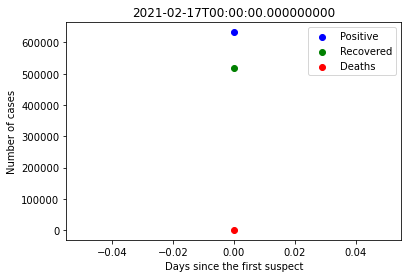

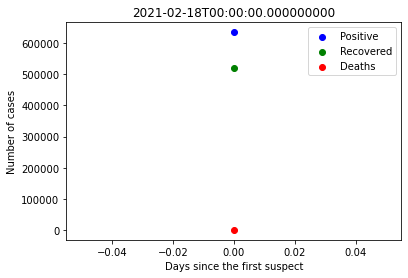

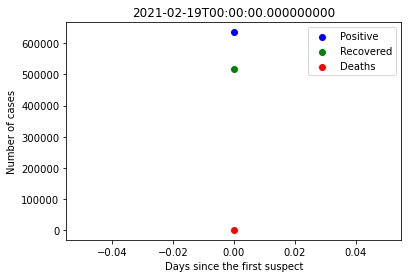

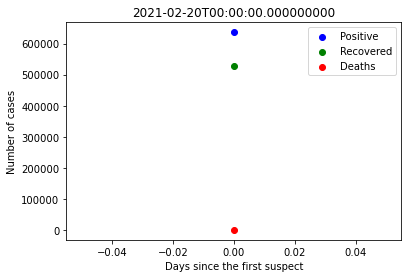

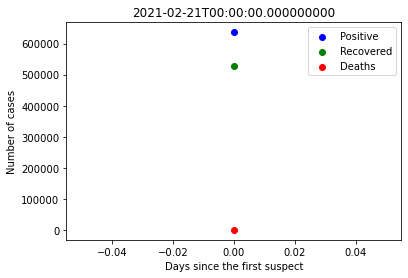

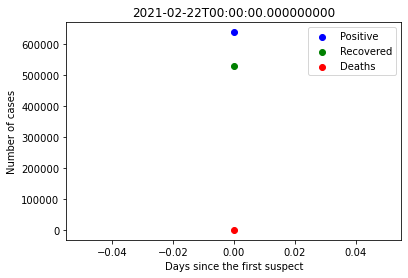

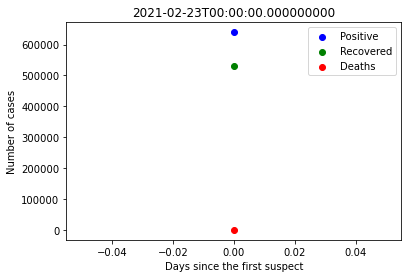

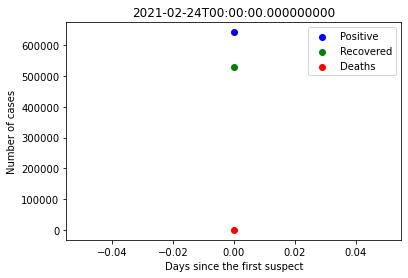

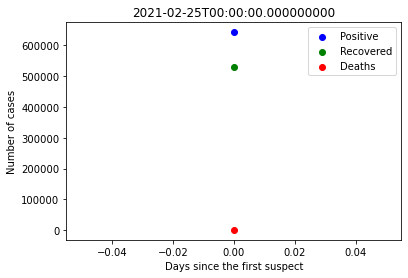

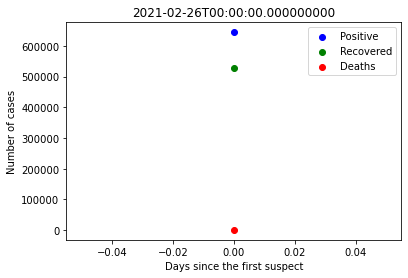

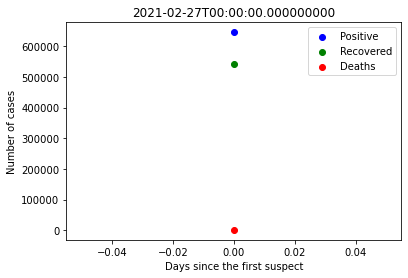

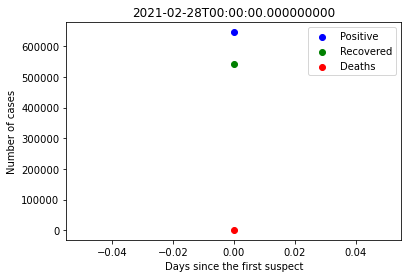

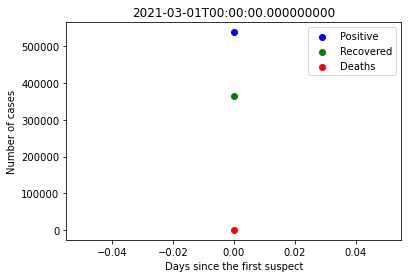

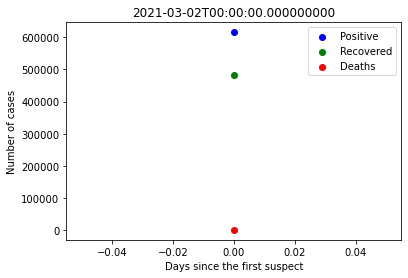

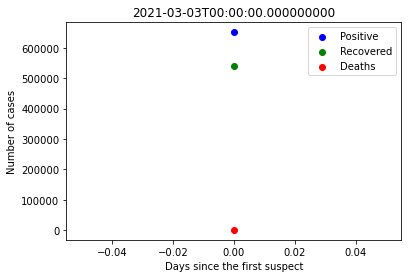

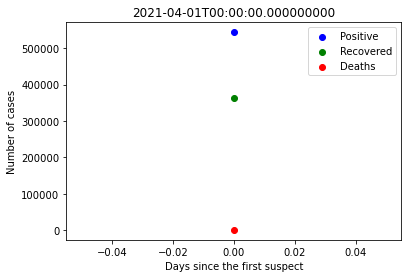

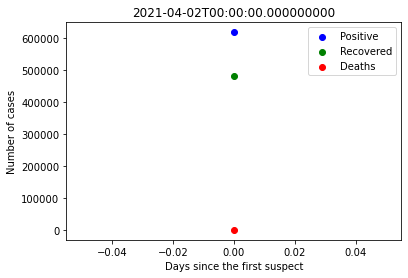

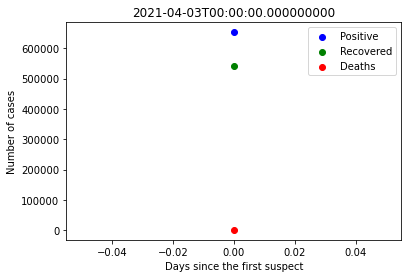

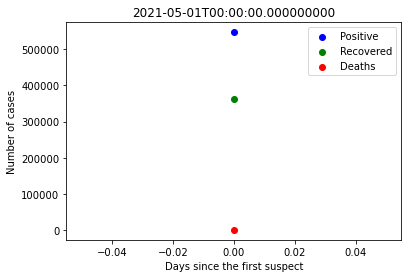

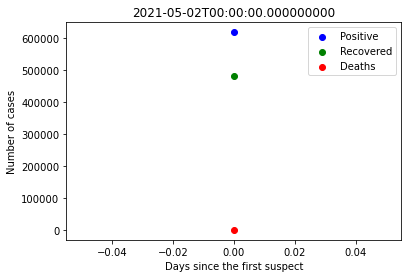

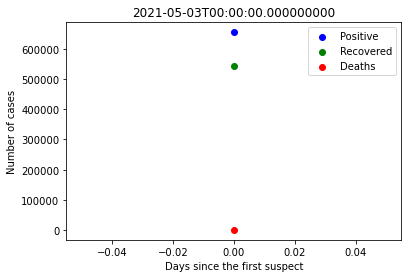

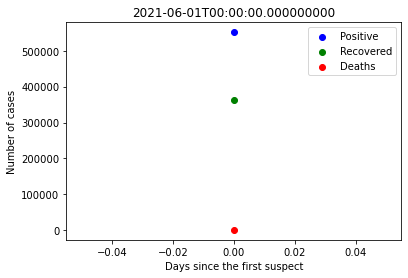

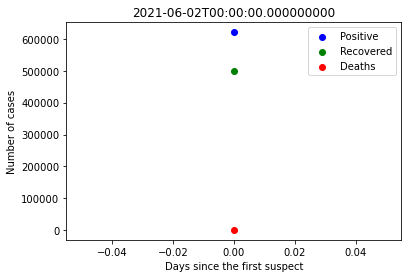

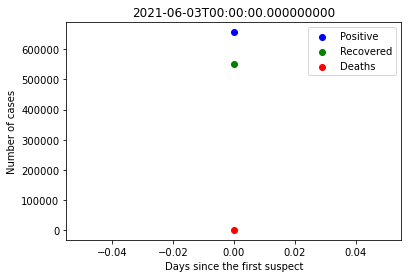

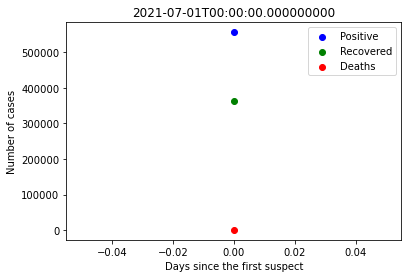

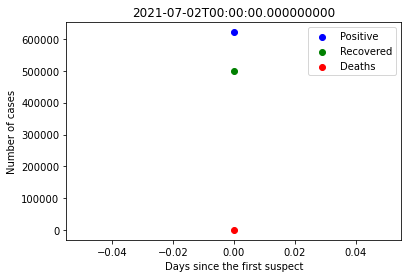

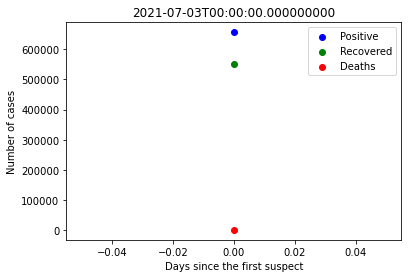

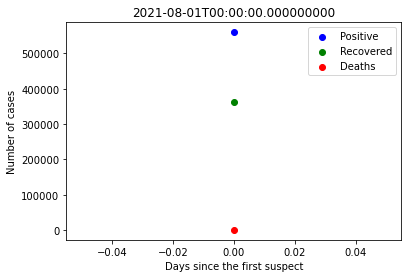

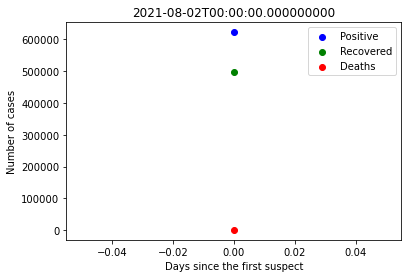

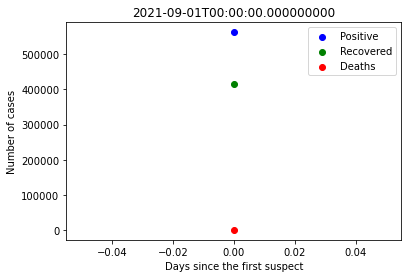

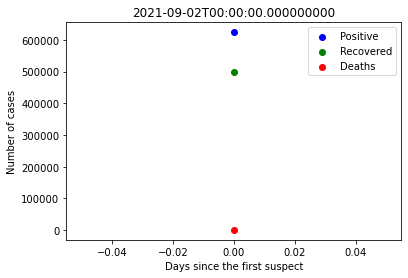

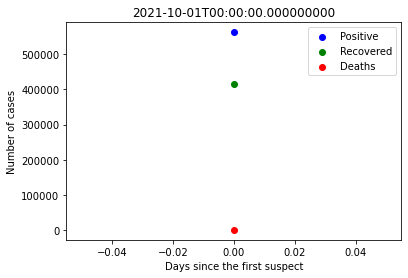

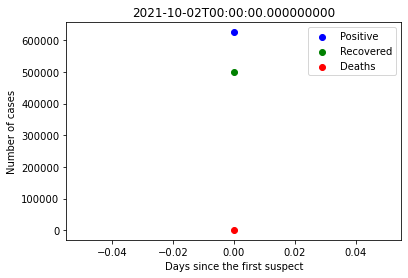

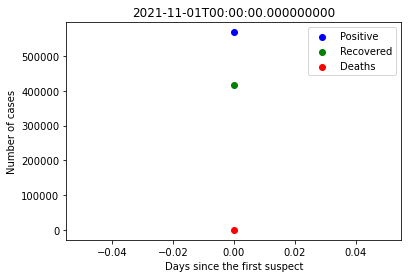

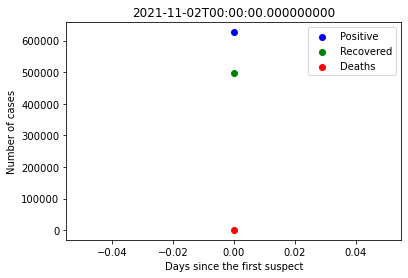

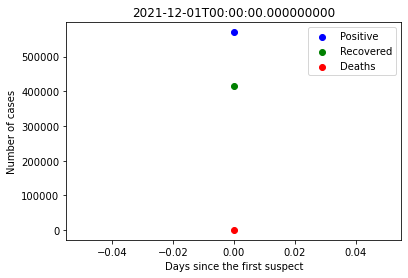

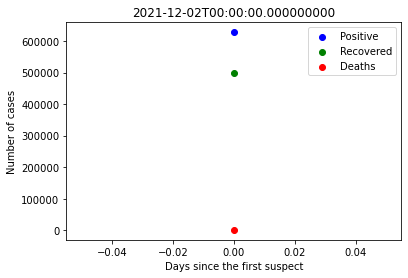

In [24]:
for idx in range (0,len(dates)):
    C = df3[df3['date']==dates[idx]].reset_index()
    plt.scatter(np.arange(0,len(C)),C['positive'],color = 'blue',label = 'Positive')
    plt.scatter(np.arange(0,len(C)),C['recovered'],color = 'green',label = 'Recovered')
    plt.scatter(np.arange(0,len(C)),C['deathProbable'],color = 'red',label = 'Deaths')
    plt.title(dates[idx])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()

In [25]:
df4 = df3.groupby('date')[['date','positive','recovered','deathProbable']].sum().reset_index()

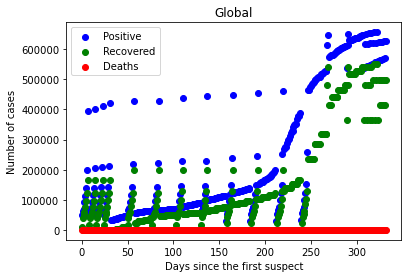

In [26]:
C = df4
plt.scatter(np.arange(0,len(C)),C['positive'],color = 'blue',label = 'Positive')
plt.scatter(np.arange(0,len(C)),C['recovered'],color = 'green',label = 'Recovered')
plt.scatter(np.arange(0,len(C)),C['deathProbable'],color = 'red',label = 'Deaths')
plt.title('Global')
plt.xlabel('Days since the first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.show()

In [ ]:
`